# Исследование интернет-магазина "Стримчик"

Данный проект распологает данными о продажах видео-игр игр до 2016 года во всемирной сети магазинов "Стримчик". Целью исследование является посредством уже имеющихся данных построить прогноз на 2017 год и спланировать рекламные компании. Предоставлен один датасет, которые хранит в себе данные о каждой проданной игре с подробным её описанием, а именно оценки пользователей, критик, возрастной рейтинг, год выпуска и платформа и также насколько она продалась в каждом регионе. 

## 1. Предобработка данных

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

### 1.1 Первичный анализ данных

In [2]:
df = pandas.read_csv("https://code.s3.yandex.net/datasets/games.csv")

In [4]:
df.head(25)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датасет "games.csv" хранит в себе информацию о продажах каждой игры в данном магазине. Имеющиеся столбцы:
1) 'Name' - название игры

2) 'Platform' - платформа на которой была выпущена игра, например Xbox или PlayStation. 

3) 'Year_of_Release' - год выпуска игры

4) 'Genre' - жанр игры

5) 'NA_sales' - количество продаж в Северной Америке исчисляется в миллионах

6) 'EU_sales' - количество продаж по Европе исчисляется в миллионах

7) 'JP_sales ' - количество продаж в Японии исчисляется в миллионах

8) 'Other_sales' - продажи в других странах, также исчисляется в миллионах

9) 'Critic_Score' - оценка критиков от 1 до 100

10) 'User_Score' - пользовательская оцена от 1 до 10

11) 'Rating' - рейтинг для определения возрастной категории игр, который присваивается организацией ESRB

Рейтинг возраста исходя из ESRB:
* "E" - Все
* "Е 10+" – Все в возрасте 10+
* "T" - подросток
* "M" – Зрелые (17+)
* "A" – Взрослый (только 18+)
* "RP" - Ожидается рейтинг
* "RP (вероятно для взрослых 17+)" – Оценка ожидается, но контент, скорее всего, предназначен для людей старше 17 лет.

Построю гистограмму по всем целочисленным данным для примерной оценки чисел.

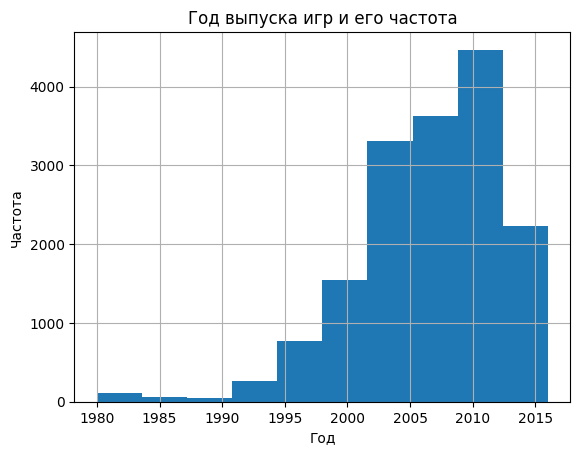

In [5]:
ax = df['Year_of_Release'].plot(kind = 'hist', grid = True, title = 'Год выпуска игр и его частота')
ax.set_xlabel('Год')
ax.set_ylabel('Частота')
plt.show()

'Year_of_Release' - как и говорилось по условию задачи содержит года до 2016 года (не включительно). Большинство данных встречаются в промежутке от 2003 до 2010 года. Самые ранние игры выходили аж в 1980 году, но таких уже довольно мало. Самые поздние катируются 2015 годом.

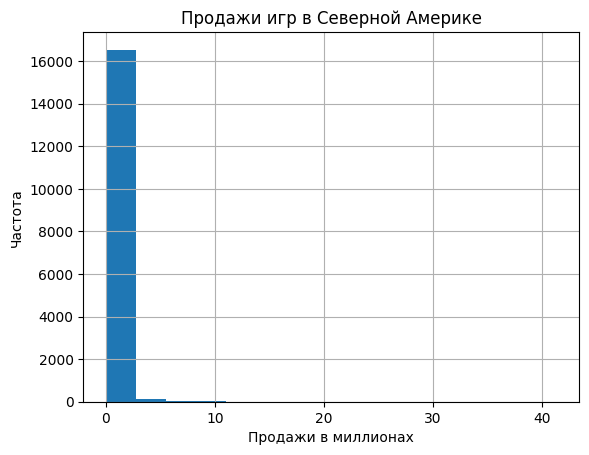

In [6]:
ax = df['NA_sales'].plot(kind = 'hist', grid = True, title = 'Продажи игр в Северной Америке', bins = 15)
ax.set_xlabel('Продажи в миллионах')
ax.set_ylabel('Частота')
plt.show()

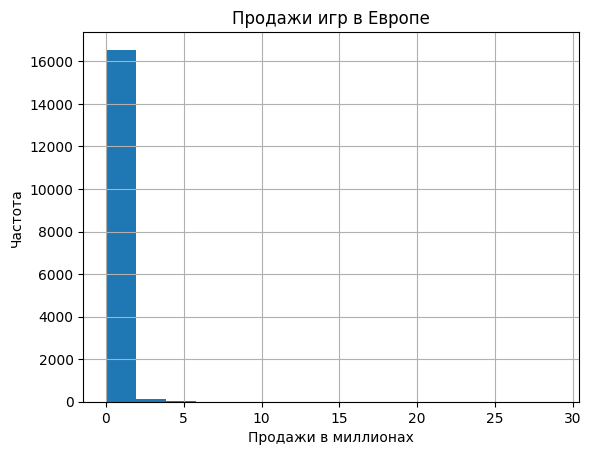

In [7]:
ax = df['EU_sales'].plot(kind = 'hist', grid = True, title = 'Продажи игр в Европе', bins = 15)
ax.set_xlabel('Продажи в миллионах')
ax.set_ylabel('Частота')
plt.show()

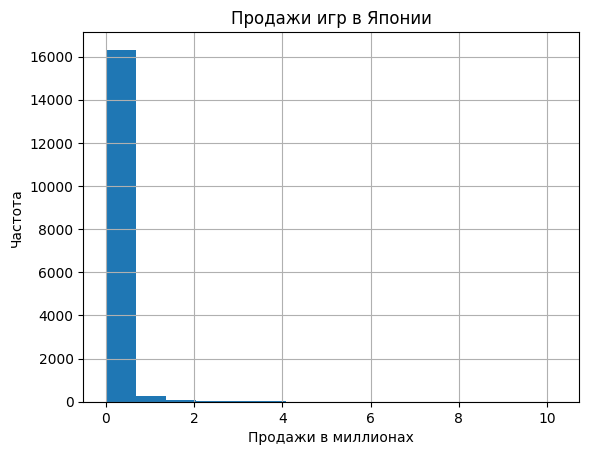

In [8]:
ax = df['JP_sales'].plot(kind = 'hist', grid = True, title = 'Продажи игр в Японии', bins = 15)
ax.set_xlabel('Продажи в миллионах')
ax.set_ylabel('Частота')
plt.show()

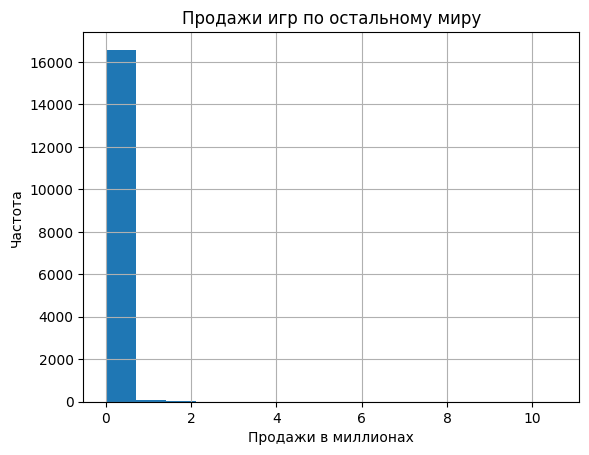

In [9]:
ax = df['Other_sales'].plot(kind = 'hist', grid = True, title = 'Продажи игр по остальному миру', bins = 15)
ax.set_xlabel('Продажи в миллионах')
ax.set_ylabel('Частота')
plt.show()

 'NA_sales / EU_sales / JP_sales / Other_sales' - исходя из гистограмм видно, что три данных столбца имеют большинство данных в одном промежутке от 0 до 2 миллионов. Продажи по Америке доходили и до 40 млн, но таких данных крайне мало. Продажи по Европе не превышали 30 млн, а в Японии и Остальных странах не превышали 10 млн.

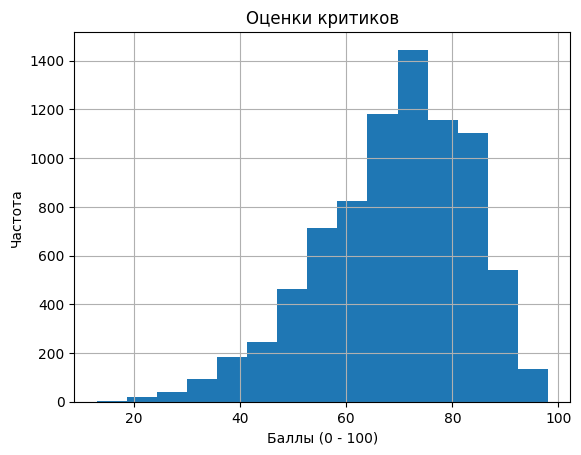

In [10]:
ax = df['Critic_Score'].plot(kind = 'hist', grid = True, title = 'Оценки критиков', bins = 15)
ax.set_xlabel('Баллы (0 - 100)')
ax.set_ylabel('Частота')
plt.show()

'Critic_Score' - данные находятся в промежутке от 0 до 100 (как и по условию) и большинство оценок нахоядстя в промежутке от 60 до 80. И встречаются крайне низкие оценки ниже 20, но их довольно мало.

Также можно заметить, что в данную подборку не вошел анологичный столбец 'Critic_Score' - 'User_Score', так как его тип данных не является числовым. Этим займусь далее.

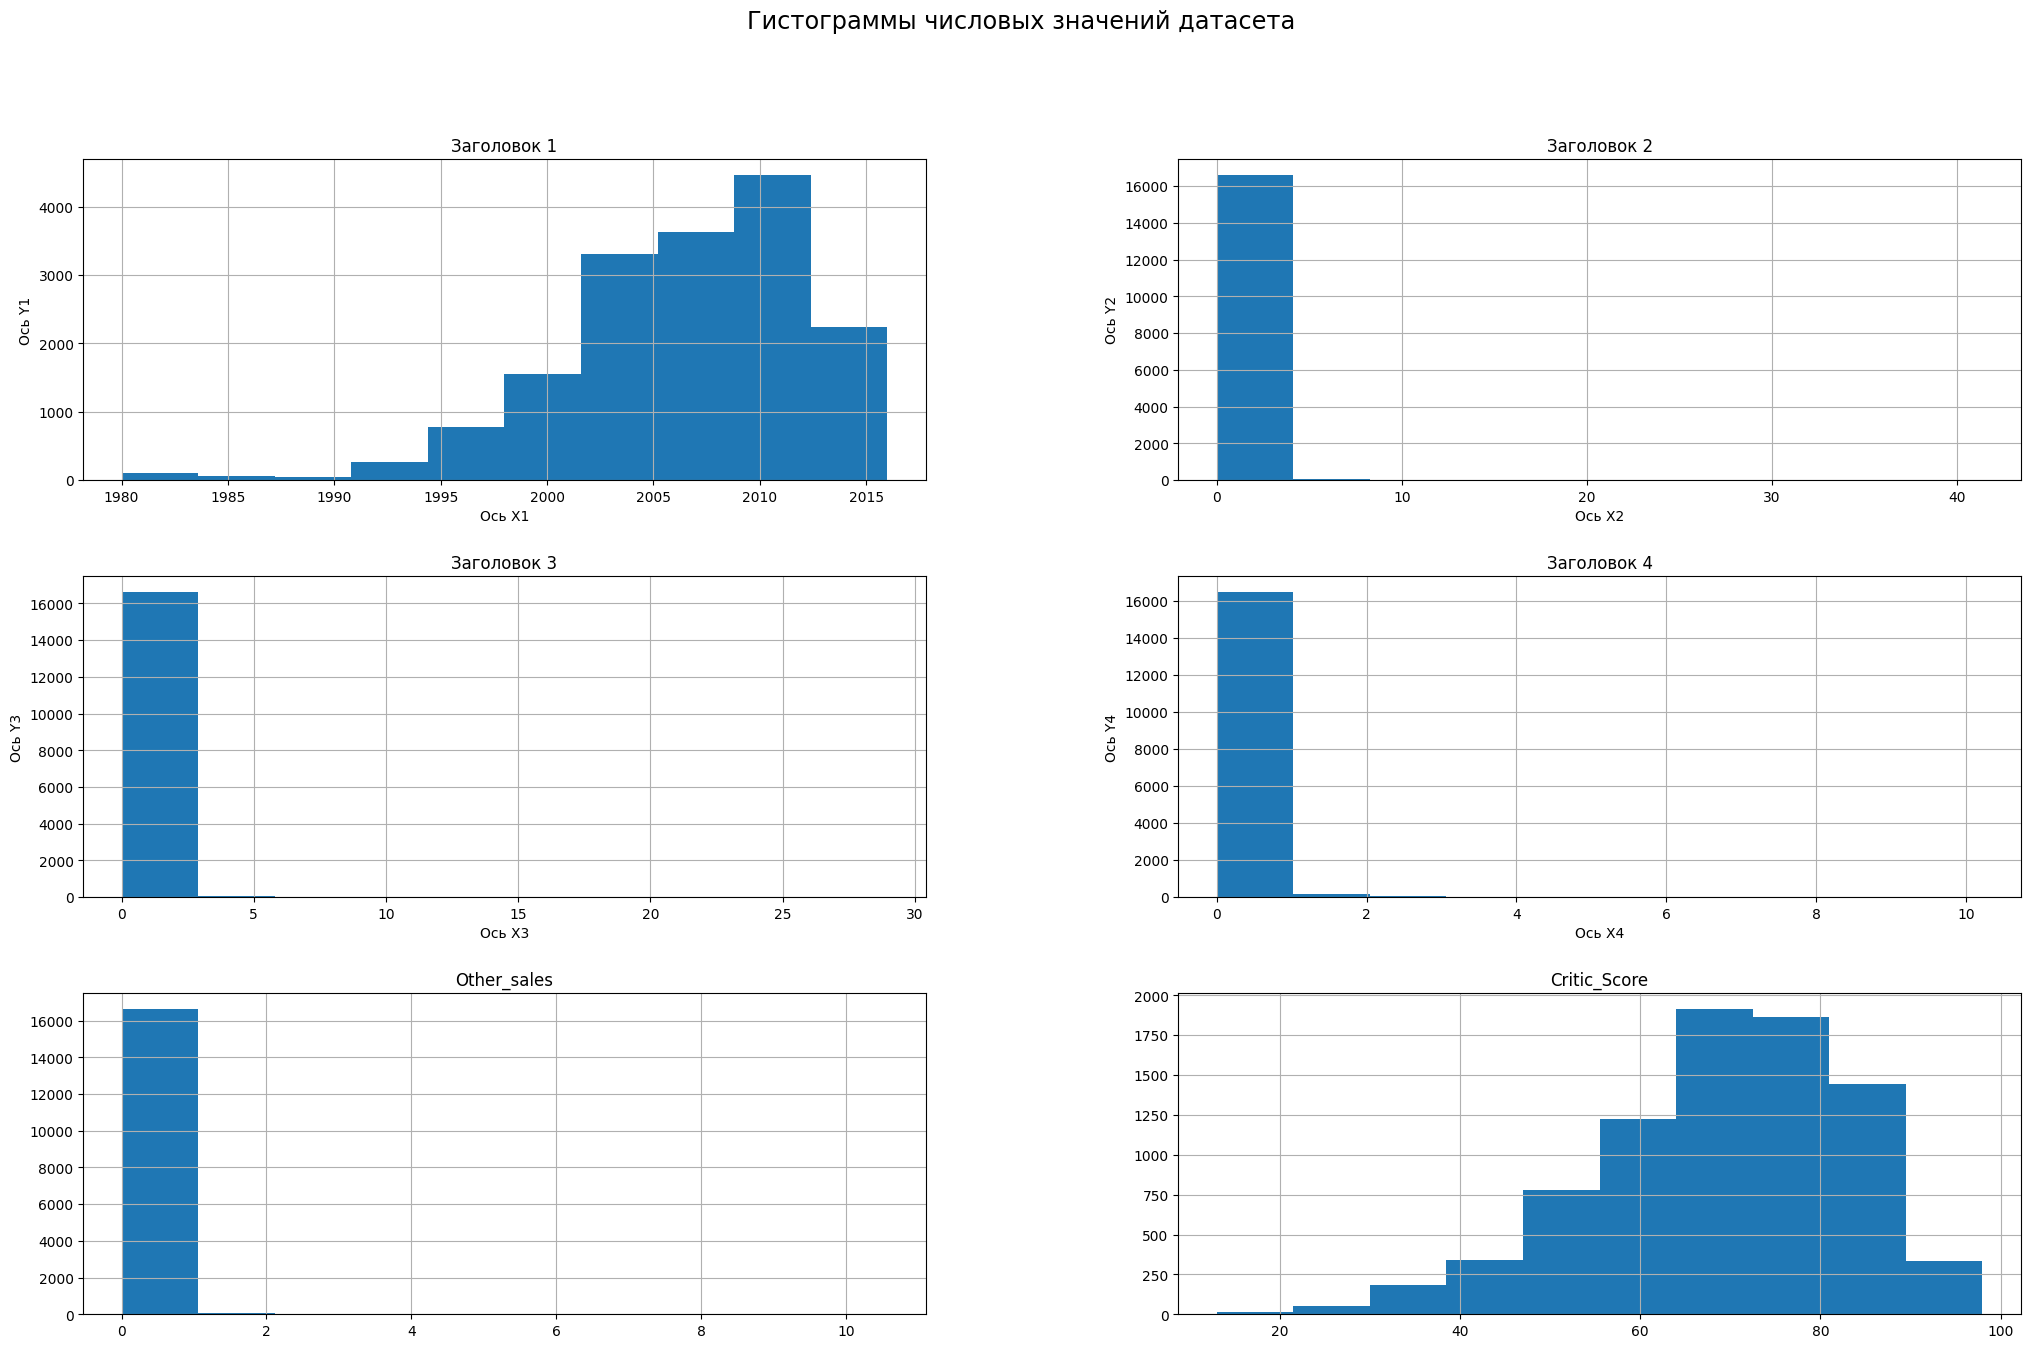

In [11]:
# Комментарий ревьюера 2
axes = df.hist(figsize = (25,15))
axes[0,0].set_title('Заголовок 1')
axes[0,0].set_xlabel('Ось Х1')
axes[0,0].set_ylabel('Ось Y1')

axes[0,1].set_title('Заголовок 2')
axes[0,1].set_xlabel('Ось Х2')
axes[0,1].set_ylabel('Ось Y2')

axes[1,0].set_title('Заголовок 3')
axes[1,0].set_xlabel('Ось Х3')
axes[1,0].set_ylabel('Ось Y3')

axes[1,1].set_title('Заголовок 4')
axes[1,1].set_xlabel('Ось Х4')
axes[1,1].set_ylabel('Ось Y4')
# И так далее по всем гистограммам

plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, изучили данные для предобработки.</font>

### 1.2 Замена названий столбцов к нужному виду

Названия столбцом полностью передают их суть, но есть ошибка в самой их записи. Нужно всё привести к нижнему регистру, а для этого воспользуюсь связкой методов .columns и str.lower(). И проверю результат всё тем же методом .columns

In [12]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 1.3 Преобразование типов данных

Выведу еще раз типы данных методом .info()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


1) 'year_of_release' - не может быть типом данных float, так как год должен быть целочисленным значением, то-есть int. Но так как в нём есть пропуски преобразовать его в int не получится. Поэтому займусь этим после удаления пропусков.

2) user_score - является на данный момент типом данных object, что будет ошибкой. Так как баллы должны быть числовым значением, так как их можно сравнивать между собой и 1 балл и 10 баллов это разные оценки и игра с оценкой 1 ниже по рейтингу. Но тут уже можно было заметить значения с плавающей запятой, поэтому данный столбец нужно преобразовать в тип данных float.

Так как значнеия в столбце являются строковыми нужно проверить какие вообще уникальные значения в нём находятся:

In [14]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди большинства числовых значений можно заметить два выбивающихся значения это "nan" и "tbd". Исходя из мировой терминологии "tbd" расшифровывается как to be determined - будет определенно, что приравнивается к пропуску значений.

In [15]:
#Воспользуюсь методом to_numeric с аргументом 'coerce', так как в данных было замечено строковое значение tbd
#Оно будет преобразованно в NULL
df['user_score'] = pandas.to_numeric(df['user_score'], errors = 'coerce')

Проверю выполнился ли правильно код методом pandas "dtypes" 

In [16]:
df['user_score'].dtypes

dtype('float64')

Построю гистограмму для оценки распределния данных:

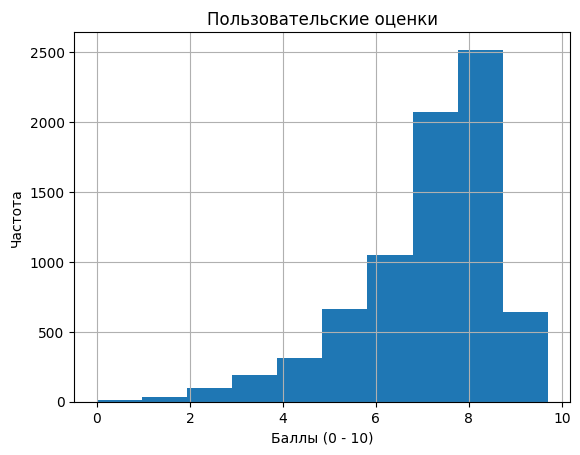

In [17]:
ax = df['user_score'].plot(kind = 'hist', grid = True, title = 'Пользовательские оценки')
ax.set_xlabel('Баллы (0 - 10)')
ax.set_ylabel('Частота')
plt.show()

Самая частая оценка это около 8 баллов, самое редко около 0. 

### 1.4 Работа с пропусками

Выведу на экран количество пропусков и затем их долю.

In [18]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [19]:
df.isna().mean() * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

Большинство пропусков находятся в столбцах 'user_score' и 'critic_score', далее столбец 'rating' и в остальных столбцах количество пропусков незначительное (меньше 2 процентов). 

Первым делом проверю есть ли закономернности в пропусках у данных столбцов, а именно выведу количество строк где значения пропущены сразу везде:

In [20]:
#Получу общие пропуски логической индексацией с методом isna() и поделю на наибольшее количество пропусков в 'user_score'
print('Общие пропуски в {:.0%}'.format(df.loc[df['user_score'].isna() & df['critic_score'].isna() & df['rating'].isna()]\
                                       .shape[0] / df['user_score'].isna().sum())\
      , 'строках.')


Общие пропуски в 73% строках.


То-есть данные пропущены не случайно и в 73% пропуски сделаны сразу в трёх столбцах. У пропусков могут быть две возможные причины:
1) Возможно это было вследствии какой-либо технической ошибки при выгрузке данных. 

2) При заполнении человеком данных об игре были случайно пропущены данные поля или просто на тот момент значения еще не были выставлены и вследствии поле было пропущено в целом и на старте продаж также не было дополненно.

#### 1.4.1 Пропуски в столбце 'rating'

Так как определенной причины пропусков нет и восстановить данные неисказив распределенние данных не получится, поэтому оставлю пропуски в данном столбце как есть.

#### 1.4.2 Пропуски в столбце 'user_score / critic_score'

При заполнении данных пропусков также можно сильно исказить набор данных, так как определённую причину пропусков выявить не получится. 

#### 1.4.3 Пропуски в столбце 'year_of_release'

In [21]:
df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


По полученным строкам можно заметить, что в некоторых играх уже в названии написан год выпуска. Но так работает не со всеми данными, поэтому пытаться заполнить данные не имеет смысла и можно просто избавиться от неправильных записей методом dropna по столбцу:

In [22]:
df = df.dropna(subset = ['year_of_release'])
#Проверю результат
df['year_of_release'].isna().sum()

0

Также заменю тип данных у столбца на int, так как года могут быть только целочисленными. 

In [23]:
df['year_of_release'] = df['year_of_release'].astype('int64')

In [24]:
df['year_of_release'].dtypes

dtype('int64')

#### 1.4.4 Создание нового столбца обозначающего количество продаж по всему миру

In [25]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [26]:
df['total_sales'].head(10)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
5    30.26
6    29.80
7    28.91
8    28.32
9    28.31
Name: total_sales, dtype: float64

### 1.5 Работа с дубликатами

#### 1.5.1 Явные дубликаты

Проверю на явные дубликаты связкой методов duplicated и sum

In [27]:
df.duplicated().sum()

0

Полностью повторяющих друг друга строчек в датафрейме нет.

#### 1.5.1 Неявные дубликаты

Проверю повторяются ли названия игр в датафрейме.

In [28]:
df['name'].value_counts().sort_values(ascending = False).head(15)

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
FIFA 14                                     9
Ratatouille                                 9
LEGO Star Wars II: The Original Trilogy     8
LEGO Jurassic World                         8
The LEGO Movie Videogame                    8
FIFA Soccer 13                              8
Lego Batman 3: Beyond Gotham                8
FIFA 15                                     8
Monopoly                                    8
Madden NFL 08                               8
Terraria                                    8
LEGO The Hobbit                             8
Madden NFL 07                               8
Name: name, dtype: int64

В данных некоторые названия повторно встречаются несколько раз. Например "Need for Speed: Most Wanted" встречается аж 12 раз. Это можно объяснить разными платформами, так как игра может выходить на любых платформах. Для проверки выведу методом query все записи с таким названием:

In [29]:
df.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,1.01
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,0.27
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


Теория подтвердилась, но с исключниями. На X360 игра игра отмеченна два раза как и на PC. При этом у них отличаются только продажи и год выпуска. Это можно объяснить тем, что игра могла перевыпуститься на той же платформе только уже с какими-либо доработками. Поэтому избавляться от таких пропусков не имеет смысла, но при аналазе стоит учитывать год выпуска игра.

Также проверю на неявные дубликаты по трём столбцам сразу - имени, платформе и году выпуска:

In [30]:
df.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

2

Есть два дубликата, выведу их с помощью логической индексации

In [31]:
df.loc[df.duplicated(subset = ['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E,0.01


В первом пропущенно имя, поэтому работать с ним не имеет смысла. А значение второго прибавлю к оригинальной строке и удалю оба дубликата после этого.

In [32]:
df.query('(name == "Madden NFL 13") & (platform == "PS3")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


С помощью логической индексации сложу строки по определённым столбцам и проверю результат с помощью метода query

In [33]:
df.loc[604, ['eu_sales', 'total_sales']] += df.loc[16230, ['eu_sales', 'total_sales']]

df.query('(name == "Madden NFL 13") & (platform == "PS3")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E,2.57
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Избавлюсь от дублирующихся строк методом drop_duplicates по определённым столбцам и дальше обновлю индексы в датафрейме методом reset_index

In [34]:
df.drop_duplicates(subset = ['name', 'platform', 'year_of_release'], inplace = True)

df.reset_index(drop = True, inplace = True)

Проверю результат: 

In [35]:
df.duplicated(subset = ['name', 'platform', 'year_of_release']).sum()

0

**Вывод по предобработке**

Перед началом анализа был проверен датасет методами info и head и также с помощью графиков были проанализированы распределния данных в числовых столбцах. Далее были приведены к нижнему регистру все названия столбцов для дальнейшего удобства работы с данными. Было замечено, что у столбца с пользовательскими оценками был строковый тип данных и  он был изменён на числовой с плавающей запятой. Также в столбце были найдены строки tbd - to be determined и они были заменены на просто пропуски. Было найдено большое количество пропусков в стобцах, но выявить их причину не удалось. Но было выяснено, что в 73% строк они были сделаны одновременно и поэтому были выдвинуты две гипотезы появления пропусков: 
1) Возможно это было вследствии какой-либо технической ошибки при выгрузке данных.

2) При заполнении человеком данных об игре были случайно пропущены данные поля или просто на тот момент значения еще не были выставлены и вследствии поле было пропущено в целом и на старте продаж также не было дополненно.

Далее также было незначительно количество пропусков в столбце с годами выпуска от них было решено просто избавиться и после этого тип данных столбца удалось изменить на целочисленный. 
После этого датасет был проверен на дубликаты, явных дубликатов, то-есть полностью повторяющих друг друга строк в нём не оказалос. Неявных дубликатов оказалось немного, всего две строки и после объединения значений они были удалены. Также воспользуюсь повторно методом info, для првоерки результатов.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Названия столбцов теперь приведены к нормальному виду, количество пропусков уменьшилось до возможного значения и типы данных в столбцах приведены к правильным вариантам. 

In [37]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' '¡Shin Chan Flipa en colores!' nan]
name : кол-во

## 2. Исследовательских анализ данных

### 2.1 Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [38]:
pivot_tab = df.pivot_table(values = 'name', index = 'year_of_release', aggfunc = 'count').reset_index()

#Переименую столбцы
pivot_tab.columns = ['Год выпуска', 'Количество игр']

pivot_tab

,Год выпуска,Количество игр
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Исходя из полученной таблицы можно заметить, что в промежутке с 1980 до 1990 число записей довольно мало. И в целом количество продаж росло с каждым годом это можно отобразить через линейный график для удобной визуализации:

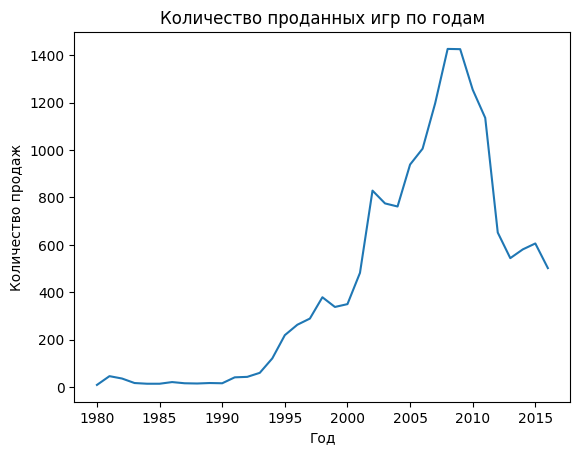

In [39]:
ax = pivot_tab.plot(kind = 'line', x = 'Год выпуска', y = 'Количество игр', title = 'Количество проданных игр по годам', legend = False)
ax.set_xlabel('Год')
ax.set_ylabel('Количество продаж')
plt.show()

<div class="alert alert-info">
<b>Подправил, вечно вылетает из головы. v2</b>   
</div>

Начиня с 1980 количество продаж росло вверх до своего пика в 2008 году. Начиная с 2009 года количество проданных копий игр начало стремительно падать вниз, этому могло послужить много факторов. Начиная от падения покупательской способности, так и отсутствием хороших в тот промежуток времени. Данные до 1990 года можно отнести к неважным, так как их довольно мало.

**Вывод: Данных за 1980 по 1990 относительно остальных достаточно мало и поэтому их можно считать как неважные.** 

### 2.2 Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Для начала нужно определить самые продаваемые платформы, для этого создам сводную таблицу где индексами будут названия платформы, а значениями общее количество продаж по ней. Также сброшу индексы у таблицы с помощью reset_index. Далее выведу на экран только первые 5 строчек таблицы, это и будут платформы с наибольшими суммарными продажами:

In [40]:
pivot_tab = df.pivot_table(values = 'total_sales', index = 'platform', aggfunc = 'sum').reset_index()

pivot_tab.columns = ['Платформа', 'Продажи']

pivot_tab.sort_values('Продажи', ascending = False).head()

,Платформа,Продажи
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


Создам список с этими платформами:

In [41]:
top_platforms = ['PS2', 'PS3', 'X360', 'Wii', 'DS']

Далее выведу распределение продаж по годам у этих платформ. Для началас создам отфильтрованный датафрейм, где будут строки только с этими платформами

In [42]:
filtered_df = df.query('platform in @top_platforms')[['platform', 'year_of_release', 'total_sales']]

filtered_df.head()

,platform,year_of_release,total_sales
0,Wii,2006,82.54
2,Wii,2008,35.52
3,Wii,2009,32.77
6,DS,2006,29.80
7,Wii,2006,28.91


Далее создаю сводную таблицу, где будут показатели продаж за каждый год для этих платформ 

In [43]:
pivot_tab = filtered_df.pivot_table(values = 'total_sales', \
                                      index = ['platform', 'year_of_release'], aggfunc = 'sum')\
                                      .reset_index()
pivot_tab.columns = ['Платформа', 'Год','Продажи']
pivot_tab.head(15)

,Платформа,Год,Продажи
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
5,DS,2008,145.31
6,DS,2009,119.54
7,DS,2010,85.02
8,DS,2011,26.18
9,DS,2012,11.01


Визуализирую таблицу через цикл for по каждому элеметну из списка top_platforms. Так как работаем с количеством продаж лучше всего подойдет линейный график.

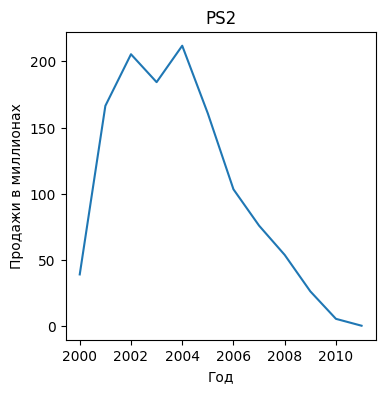

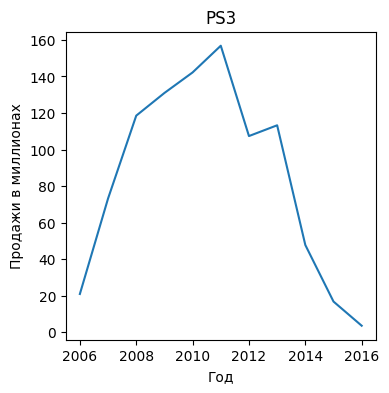

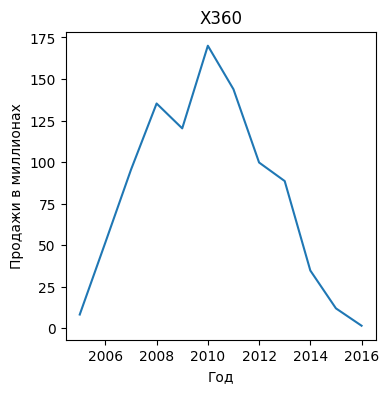

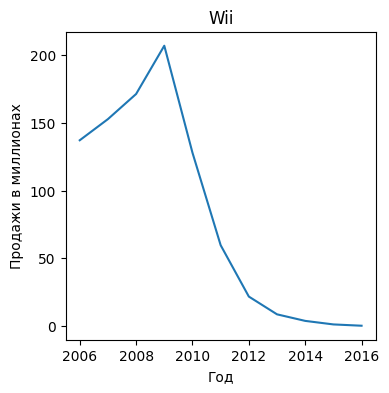

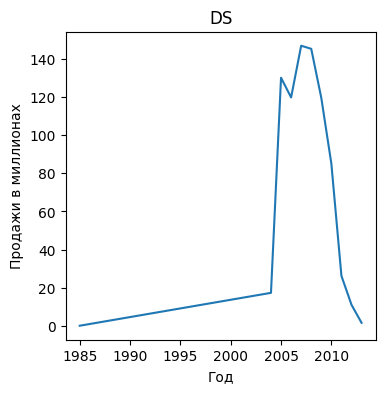

In [44]:
for platform in top_platforms:
    ax = pivot_tab.query('Платформа == @platform')\
    .plot(kind = 'line', x = 'Год', y = 'Продажи', title = platform, figsize = (4, 4), legend = False)
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи в миллионах')
    plt.show()

<div class="alert alert-info">
<b>Исправил v2</b>   
</div>

По графику можно заметить, что у каждой платформы есть свой пик популярности и также дальнейший спад. Также каждая платформа набирала популярность. Можно легко заметить как одна платфора заменила другую по графикам PS2 и PS3. PS2 начиная с 2006 года стала терять свою популярность и это можно связать как раз с появлением PS3 в том же году. И дальше количество продаж игр на PS2 стремительно падало, а у нового поколения консоли росло. Также можно заметить, что у PS3 и X360 пики популярности и спада примерно совпадают, это можно объяснить тем, что они являются друг друга прямыми конкурентами и выпускались с одни года. Такая же ситуация с Wii и DS. Популярность DS стремительно упала, когда WII начала набирать её и также потеряла в 2016 году. 

Можно прийти к выводу, что у любой платформы срок жизни около 10 лет. Дальше старые платформы уже начинают исчезать и набирают популярность новые.

**Вывод: В среднем за 10 лет появляются новые и исчезают старые платформы** 

In [45]:
# Комментарий ревьюера
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

### 2.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальным периодом можно назвать данные с 2013 по 2016, так как оснонвым фактором для них являются, что по ним будут строиться прогнозы на 2017 год.

**Вывод: Актуальными данными буду считать период с 2013 по 2016 года**

### 2.4 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Нужно взять только те данные, что начинаются с 2013 по 2016 с помощью query для дальнейшего анализа по данному датафрейму и выделить те что выше всего. 

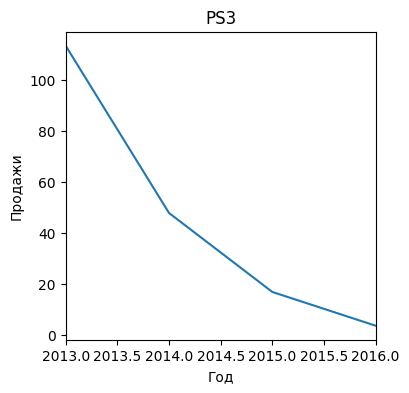

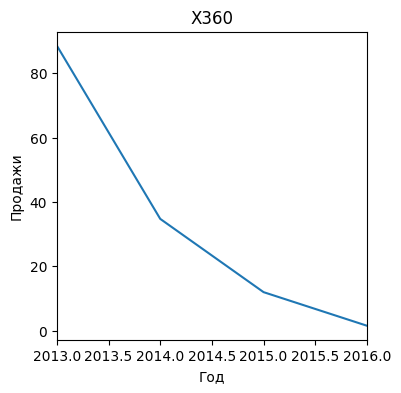

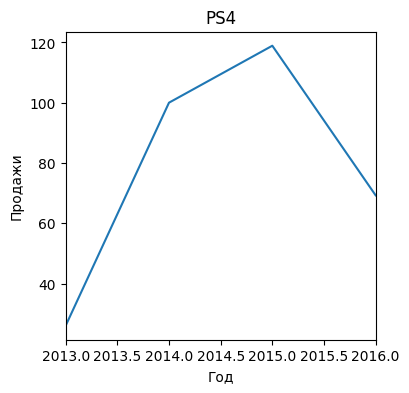

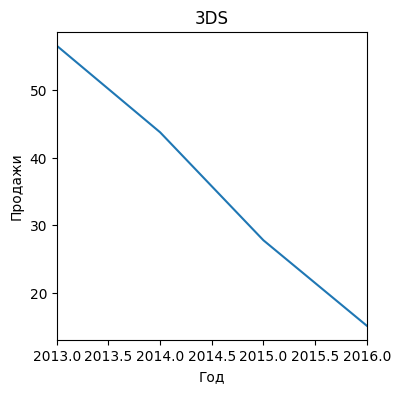

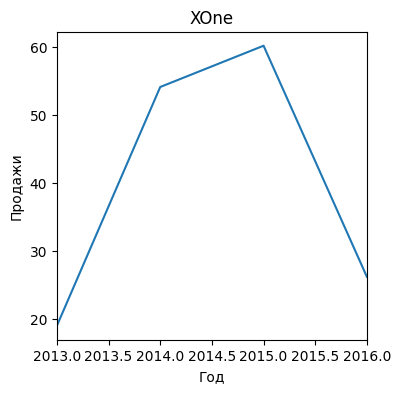

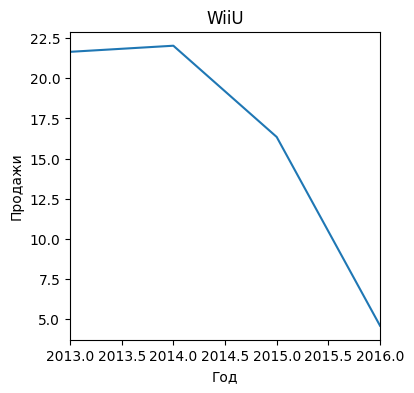

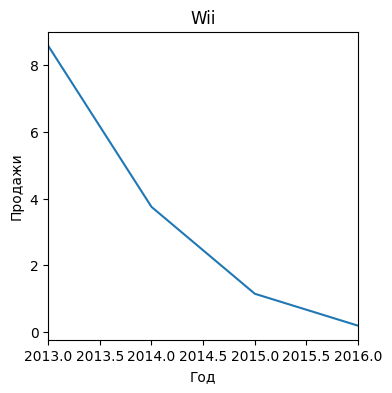

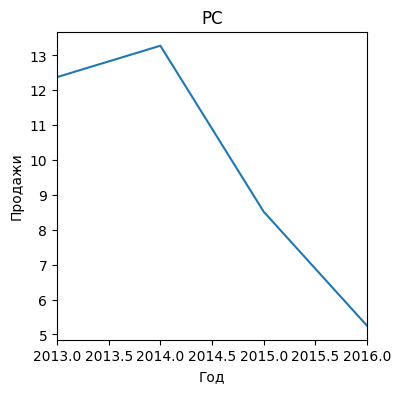

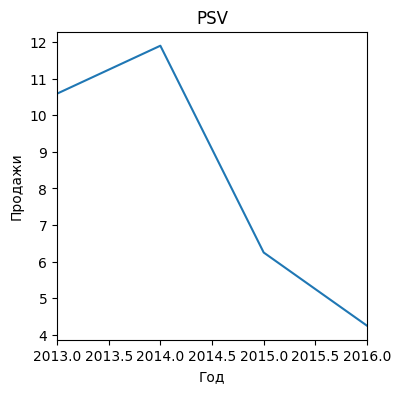

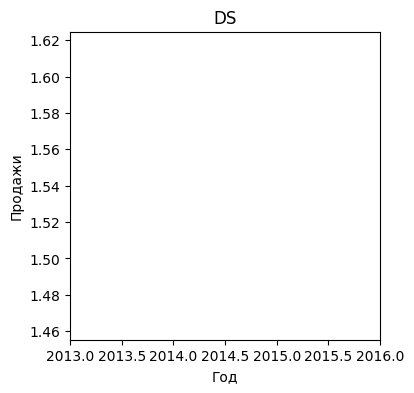

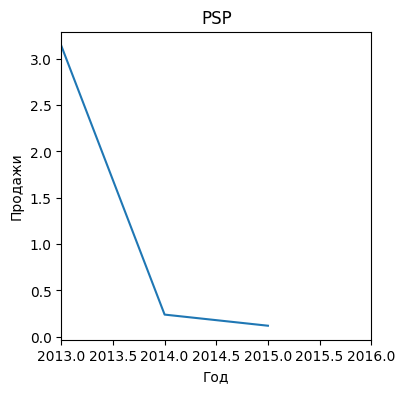

In [46]:
filtered_df = df.query('year_of_release > 2012')

pivot_tab = filtered_df.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index()

pivot_tab.columns = ['Платформа', 'Год','Продажи']

for platform in filtered_df['platform'].unique():
    ax = pivot_tab.query('Платформа == @platform').plot(kind = 'line', x = 'Год', y = 'Продажи', title = platform, figsize = (4, 4), xlim = (2013, 2016), legend = False)
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи')
    plt.show()

Исходя из графиков можно заметить, что самые высокие показатели на конец 2015 года у XOne и PS4, так как они являются последними моделями и если выбирать потенциально прибыльные платформы то тут лучше всего подойдут они, так как остальные уже считаются устаревшими. PS4 нужно выделить как более вероятную, так как график продаж у неё даже на 2016 год остаётся довольно высоким. 

**Вывод: Потенциально прибильные платформами можно назвать PS4 и XOne**

### 2.5 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

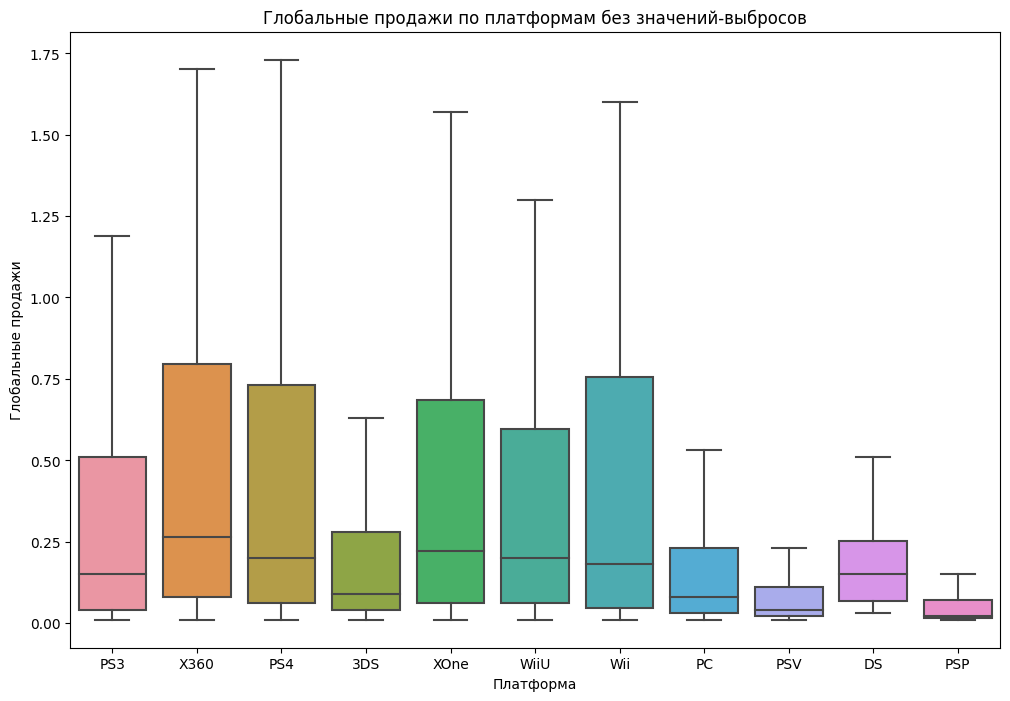

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x="platform", y="total_sales", showfliers = False)
plt.title('Глобальные продажи по платформам без значений-выбросов')
plt.ylabel('Глобальные продажи')
plt.xlabel('Платформа')
plt.show()

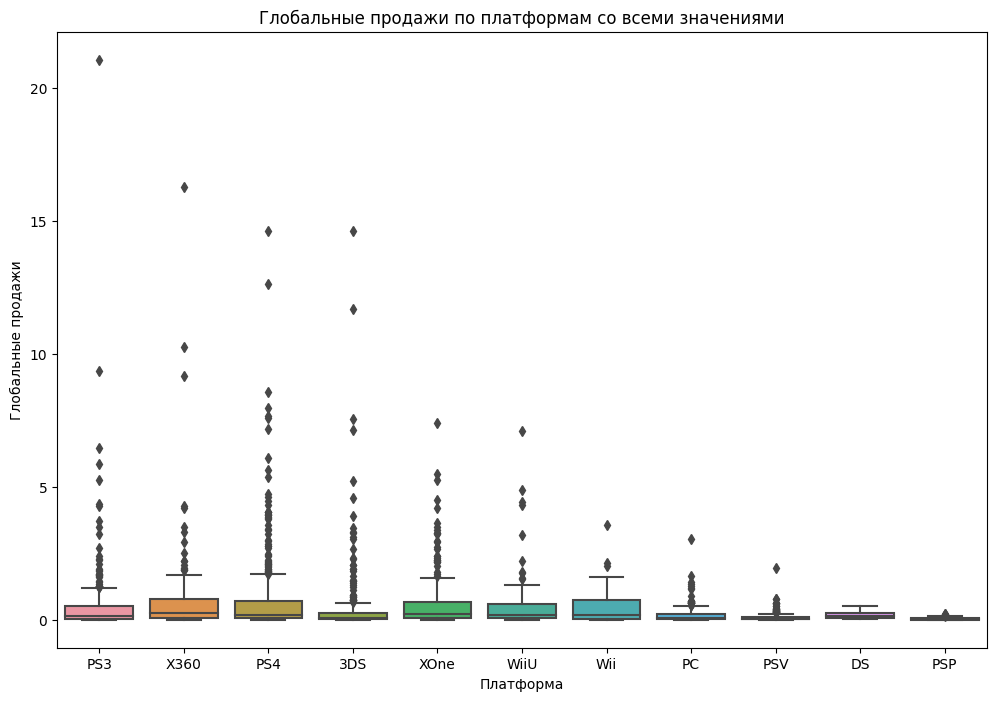

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x="platform", y="total_sales", showfliers = True)
plt.title('Глобальные продажи по платформам со всеми значениями')
plt.ylabel('Глобальные продажи')
plt.xlabel('Платформа')
plt.show()

Значения из графиков: 

1) PS3 медиана около 0.15 - 150000 и выбросы начинаются от 2 миллионов

2) X360 медиана около 0.30 и выбросы от 2.5 миллионов

3) PS4 медиана приблизительно 0.25 и выбросы ближе к 2 миллионам и выше

4) 3DS медиана около 0.10 и выбросы от 0.70

5) XOne медиана около 0.25 и выбросы от 1.60 (один миллион шестьсот тысяч)

6) WiiU медиана около 0.20 и выбросы начинаются от 1.25

7) Wii медиана около 0.20 и выбросы от 1.65

8) PC Медиана около 0.10 и выбросы начинаются от 0.60

9) PSV медиана также около 0.05 и выбросы ближе к 0.25

10) Стоит подметить, что график сдвинут и 25% квантиль начинается с 0.05-0.10. Медиана около 0.20 и выбросы начинаются с 0.60

11) PSP медиана около 0.05 и выбросы от 0.15

**Вывод: Чем моложе платформа тем больше выбросов в данных и экстремально высоких значений. Это можно объяснить, тем что выборка взята от 2013 года и старые платформы уже потеряли популярность и значения у них более предсказумые и стабильные. Ну и чем дальше 75% квантиль, верхний "ус коробки" тем больше встречаются высокие значения продаж у платформы.**


### 2.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для начала создам отдельный датафрейм с выбранной популярной платформой:

In [49]:
top_platform = filtered_df.query('platform == "PS4"')

Нарисую диаграмму рассеяния между оценками критиков и суммарными продажами:

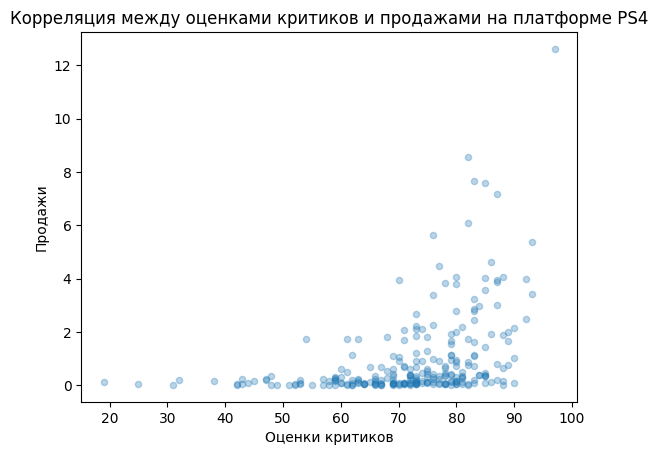

In [50]:
ax = top_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, title = 'Корреляция между оценками критиков и продажами на платформе PS4')

ax.set_xlabel('Оценки критиков')
ax.set_ylabel('Продажи')

plt.show()

In [51]:
print('Коэффициент корреляции между оценками критиков и продажами:', \
      top_platform['critic_score'].corr(top_platform['total_sales']))

Коэффициент корреляции между оценками критиков и продажами: 0.4065679020617816


Исходя из полученных результатов можно заметить, что есть положительная корреляция, то-есть с ростом оценок критиков растут и продажи. Связь между двумя величинами имеется, но не слишком сильная.

Построю диаграмму рассеяния для оценок пользователей:

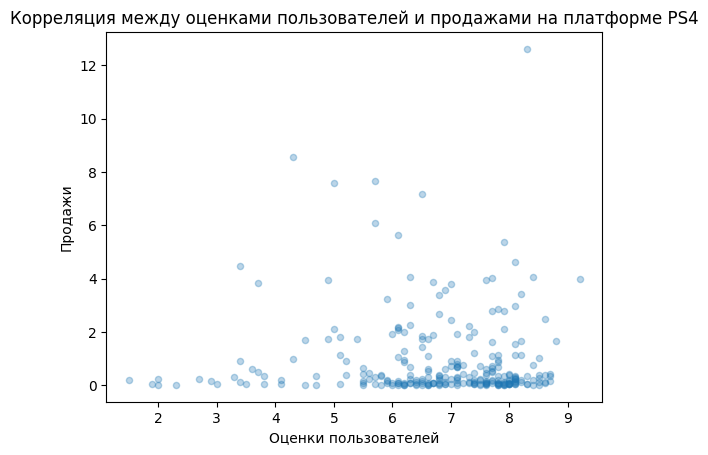

In [52]:
ax = top_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, title = 'Корреляция между оценками пользователей и продажами на платформе PS4')

ax.set_xlabel('Оценки пользователей')
ax.set_ylabel('Продажи')

plt.show()

In [53]:
print('Коэффициент корреляции между оценками пользователей и продажами:', \
      top_platform['user_score'].corr(top_platform['total_sales']))

Коэффициент корреляции между оценками пользователей и продажами: -0.03195711020455643


Тут уже корреляция менее явная и её скорее нет, чем есть. А по коэффициенту Пирсона корреляция скорее обратная. Поэтому тут связь нельзя выделить и утверждение, что чем выше оценки пользователей тем выше продажи подтвердить нельзя.


**Вывод: На продажи оценки критиков влияют сильнее, чем оценки пользователей. Это можно объяснить тем, что критикам обычно игры достаются раньше, так сказать на предварительную оценку. Поэтому собственно большинство продаж происходит в момент когда еще не все пользователи выставили оценки и покупатели зачастую опираются на оценки критиков.**

### 2.7 Соотнесите выводы с продажами игр на других платформах.

Также создам отфильтрованный датафрейм только уже с другой платформой:

In [54]:
another_platform = filtered_df.query('platform == "PC"')

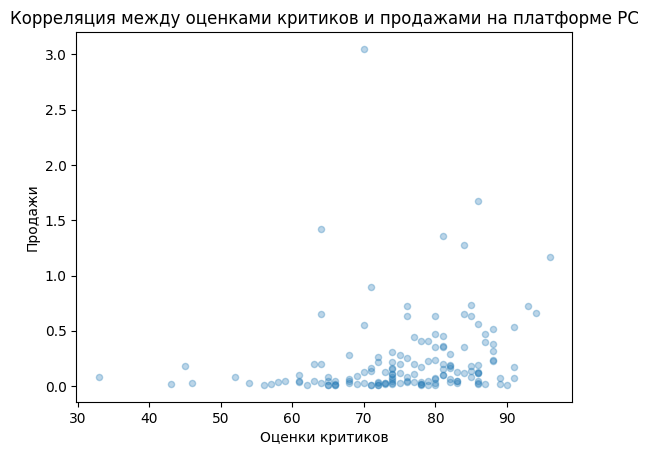

In [55]:
ax = another_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, title = 'Корреляция между оценками критиков и продажами на платформе PC')

ax.set_xlabel('Оценки критиков')
ax.set_ylabel('Продажи')

plt.show()

In [56]:
print('Коэффициент корреляции между оценками критиков и продажами:', \
      another_platform['critic_score'].corr(another_platform['total_sales']))

Коэффициент корреляции между оценками критиков и продажами: 0.1960302829436937


С оценками критиков вышло аналогично прошлому примеру, но уже корелляция немного слабее. Возможно люди покупающие игры на Персональном Компьютере меньше полагаются на оценки критиков.

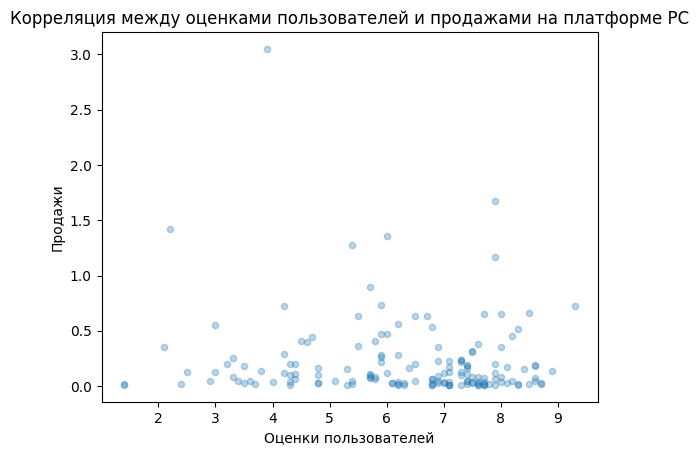

In [57]:
ax = another_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, title = 'Корреляция между оценками пользователей и продажами на платформе PC')


ax.set_xlabel('Оценки пользователей')
ax.set_ylabel('Продажи')

plt.show()

In [58]:
print('Коэффициент корреляции между оценками критиков и продажами:', \
      another_platform['user_score'].corr(another_platform['total_sales']))

Коэффициент корреляции между оценками критиков и продажами: -0.09384186952476749


Также отрицательная корреляция и сказать, что рост оценки пользователей повышает продажи нельзя.

Проверю также другие популярные платформы XOne, 3DS и PS3:

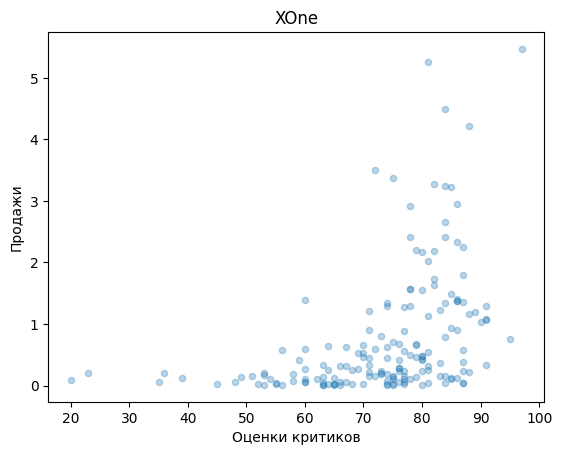

Коэффициент корреляции между оценками критиков и продажами: 0.4169983280084017


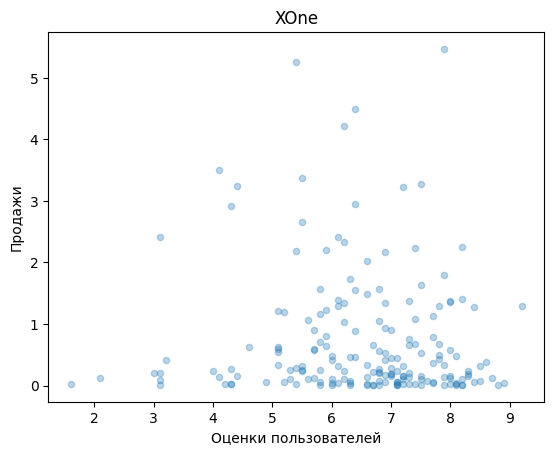

Коэффициент корреляции между оценками критиков и продажами: -0.06892505328279416


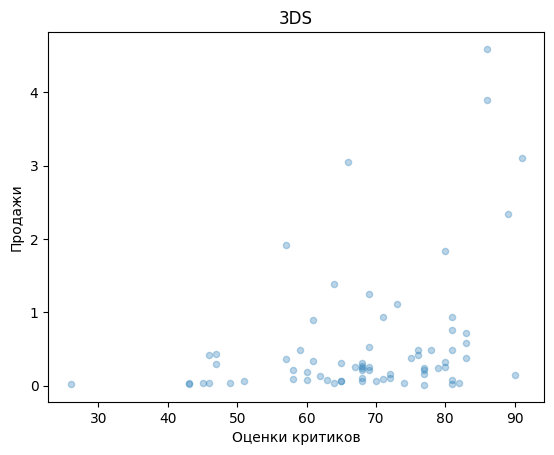

Коэффициент корреляции между оценками критиков и продажами: 0.3570566142288103


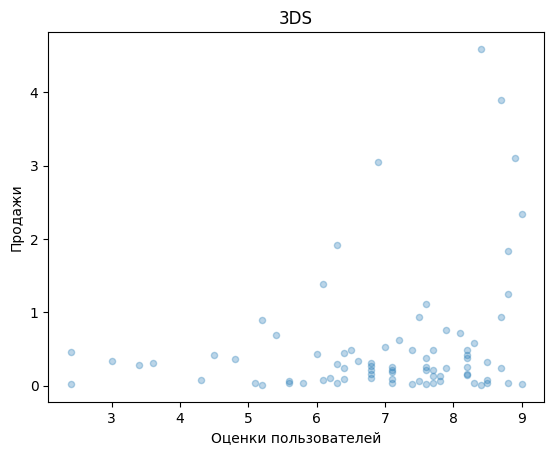

Коэффициент корреляции между оценками критиков и продажами: 0.24150411773563016


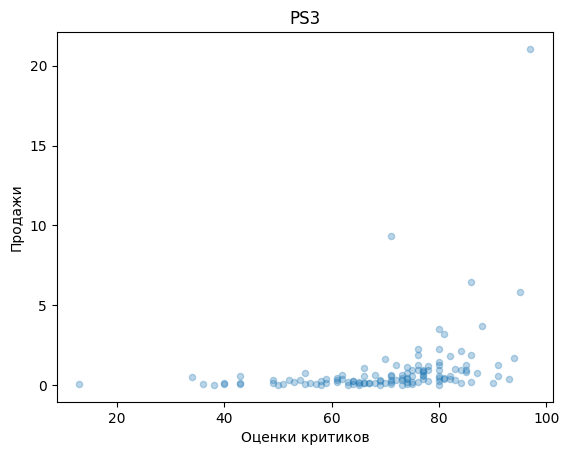

Коэффициент корреляции между оценками критиков и продажами: 0.3342853393371919


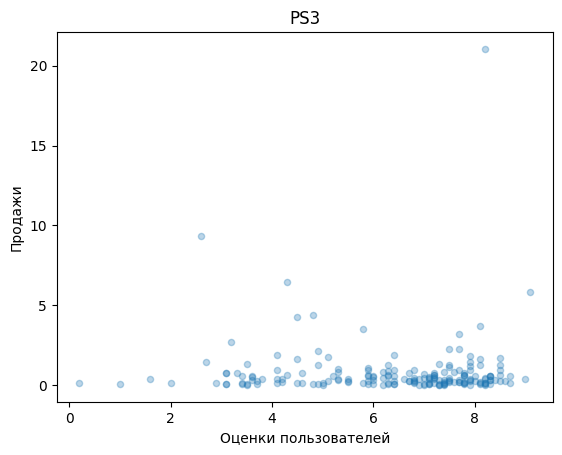

Коэффициент корреляции между оценками критиков и продажами: 0.0023944027357566907


In [59]:
platform_list = ['XOne', '3DS', 'PS3']

for platform in platform_list:
    another_platform = filtered_df.query('platform == @platform')
    
    ax = another_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, title = platform)
    ax.set_xlabel('Оценки критиков')
    ax.set_ylabel('Продажи')
    plt.show()
    
    print('Коэффициент корреляции между оценками критиков и продажами:', \
        another_platform['critic_score'].corr(another_platform['total_sales']))
    
    ax = another_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, title = platform)
    ax.set_xlabel('Оценки пользователей')
    ax.set_ylabel('Продажи')
    plt.show()
    
    print('Коэффициент корреляции между оценками критиков и продажами:', \
        another_platform['user_score'].corr(another_platform['total_sales']))

1) XOne также положительная корреляция в оценках критиков. Но корреляция недостаточно сильная, чтобы что-то утверждать. А в оценках пользователей также не наблюдается взаимосвязи, точки на графике распологаются довольно хаотично.

2) 3DS показала схожий результат, есть небольшая взаимосвязь между оценками критиков и продажами. Но тут также можно заметить довольно слабую корреляцию на оценках пользователей.

3) PS3 также слабая корреляция на оценках критиков, но она есть. А с оценками пользователей взаимосвязи почти никакой. 

**Вывод: Теория также была проверена на других платформах и была найдена слабая корреляция между оценками критиков и продажами игры. А с оценками пользователей её либо вообще нет, либо она слишком слабая.** 

### 2.8 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Для этого буду использовать круговую диаграмму с отображением доли для каждого жанра.

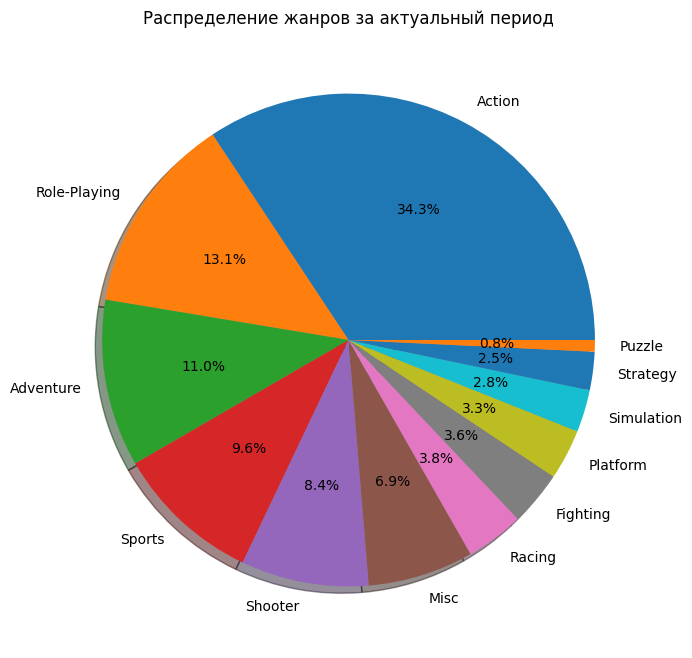

In [60]:
filtered_df['genre'].value_counts()\
.plot(kind = 'pie', 
      autopct='%1.1f%%',
      shadow = True, 
      ylabel= '', 
      figsize = (8, 8),
      title = 'Распределение жанров за актуальный период',
      fontsize = 10)

plt.show()

Самым часто-встречающимся жанром является Action, он занимает почти 35% процентов от всей доли игр. Самым непопулярным Puzzle с его 0.8% процентами. Также популярными жанрами являются RolePlaying, Adventure, Sports и Shooter. Людям больше нравятся активные игры, нежели чем игры с упором на умственную нагрузку. 

In [61]:
pivot_tab = filtered_df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').reset_index()

pivot_tab.columns = ['Жанр', 'Суммарные продажи']

pivot_tab = pivot_tab.sort_values('Суммарные продажи', ascending = False)

pivot_tab

,Жанр,Суммарные продажи
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


Text(0, 0.5, 'Продажи')

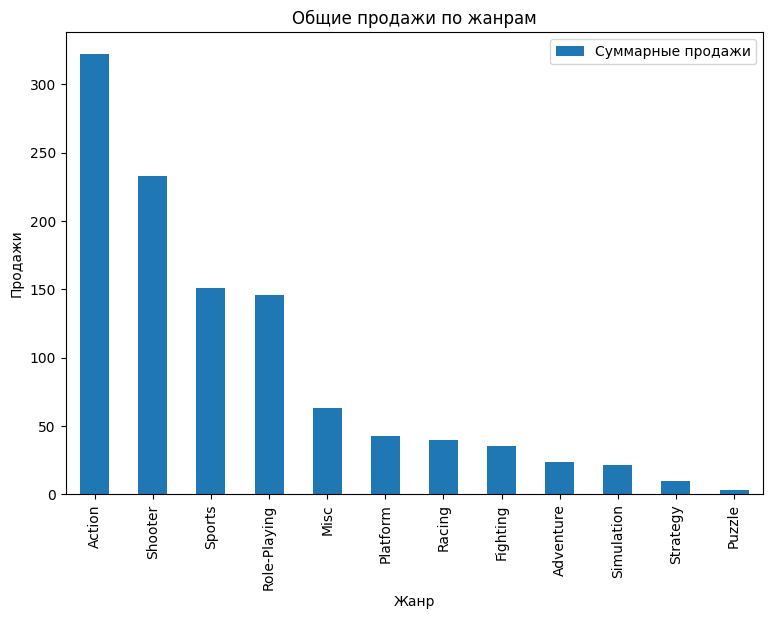

In [62]:
ax = pivot_tab.plot(kind = 'bar', figsize = (9, 6), x = 'Жанр', y = 'Суммарные продажи', title = 'Общие продажи по жанрам')

ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи')

Также если посмотреть по продажам снова можно в лидерах увидеть Action, таких игр много и еще они и продаются хорошо. Стоит тажке выделить Shooter, их относительно Action игр меньше, но продаются они достаточно хорошо. Ну и самыми менее продаваемым снова оказался Puzzle. Что укрепляет теорию о том, что клиентам больше нравятся активыне игры. Что тажке занятно Adventure игры на данной графике уже показывают себя сильно хуже и продаются они меньше, поэтому ставить на них не рекомендуется в виду низкой окупаемости. Но это всё общее количество продаж и оно может быть нестабильным и у каждой платформы сильно отличаться, для построения вывода нужно проверить еще медианные значения по каждому жанру.

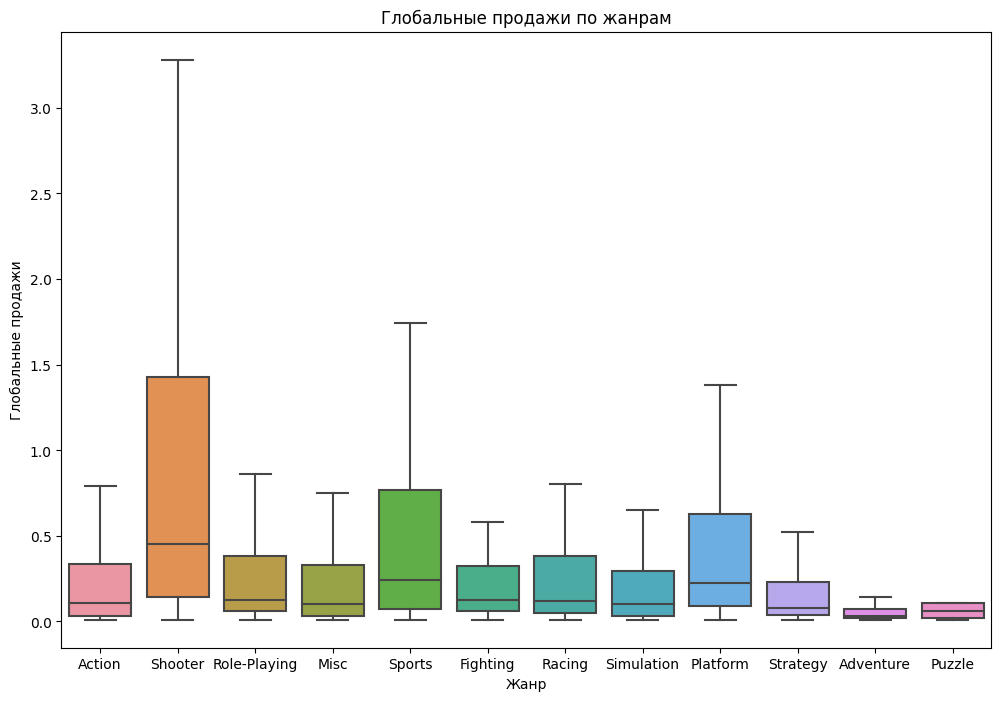

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x="genre", y="total_sales", showfliers = False)
plt.title('Глобальные продажи по жанрам')
plt.ylabel('Глобальные продажи')
plt.xlabel('Жанр')
plt.show()

Проверив медианные значения можно заметить, что жанр Action уже хуже себя показывает и явно выделяется Shooter, Sports и Platform. При взгляде на все платформы они окупаются лучше.


**Вывод: Игры категории Action принесли магазину наибольшую прибыль, но если взять медианное значение, то они окупались хуже, поэтому они менее стабильны и могут не окупиться. В то же время Shooter, Sports в двух графиках показали себя хорошо и лучше ставить на них при выявлении потенциально прибыльных жанров.**

## 3. Портрет пользователя из каждого региона

### 3.1. Пользователь из Северной Америки (NA)

#### 3.1.1 Наиболее популярные платформы в Северной Америке

Для начала нужно выделить самые популярные платформы для этого воспользуюсь также сводные таблицами:

In [64]:
na_platform_pivot = filtered_df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').reset_index()

na_platform_pivot.columns = ['Платформа', 'Продажи в NA']

na_platform_pivot = na_platform_pivot.sort_values('Продажи в NA', ascending = False)

na_platform_pivot

,Платформа,Продажи в NA
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20
8,WiiU,29.21
2,PC,11.11
7,Wii,6.56
6,PSV,5.04
1,DS,0.57


Самые продаваемая платформа это PS4, а PSP является самой непродаваемой.

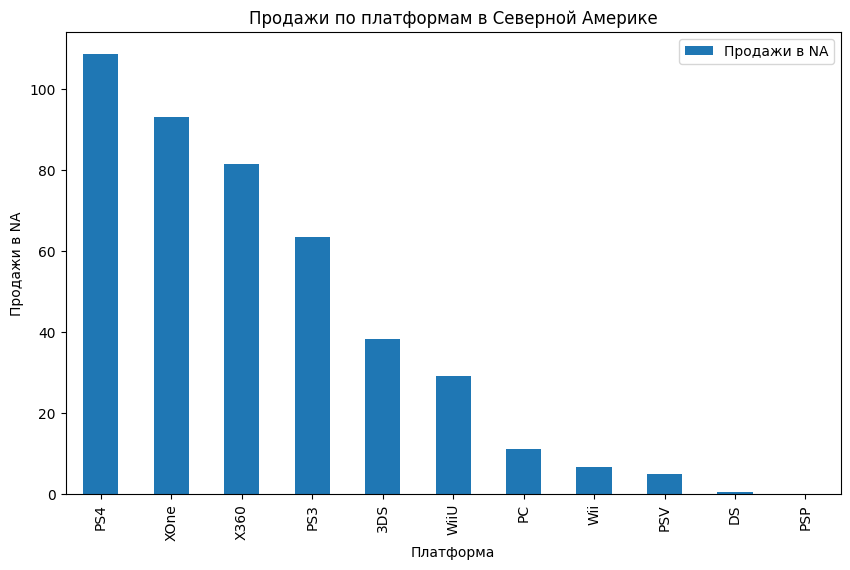

In [65]:
ax = na_platform_pivot.plot(
    kind = 'bar',
    x = 'Платформа',
    y = 'Продажи в NA', 
    figsize = (10, 6),
    title = 'Продажи по платформам в Северной Америке')

ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи в NA')

plt.show()

Самыми популярными платформами в Северной Америке являются PS4 и XOne, далее идут X360, PS3 и 3DS. Самая непопулярная консоль это PSP по ней было продаж за послледние 4 года в данном регионе.

#### 3.1.2 Наиболее популярные жанры в Северной Америке

In [66]:
na_genre_pivot = filtered_df.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').reset_index()

na_genre_pivot.columns = ['Жанр', 'Продажи в NA']

na_genre_pivot = na_genre_pivot.sort_values('Продажи в NA', ascending = False)

na_genre_pivot

,Жанр,Продажи в NA
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49
4,Platform,18.14
2,Fighting,15.55
6,Racing,12.96
1,Adventure,7.14
9,Simulation,4.86


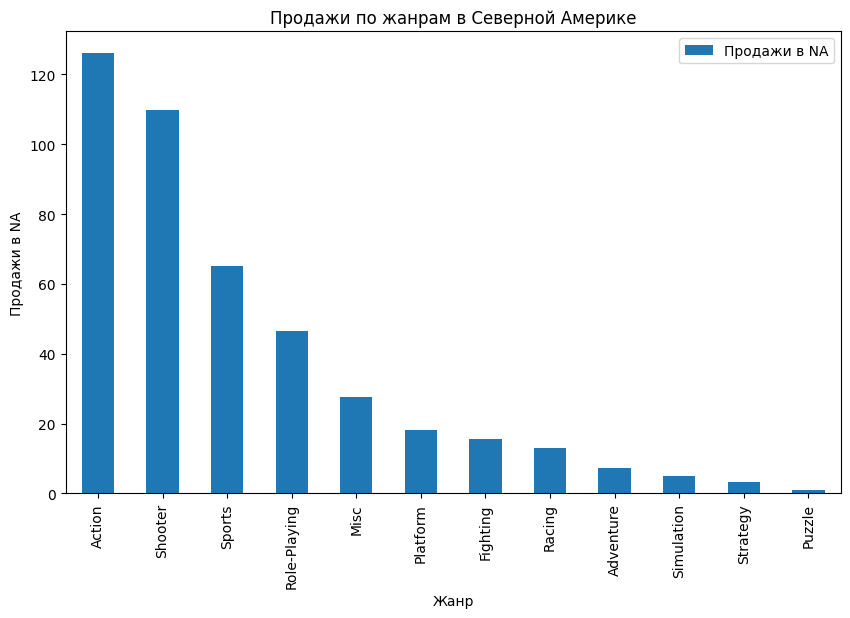

In [67]:
ax = na_genre_pivot.plot(
    kind = 'bar',
    x = 'Жанр',
    y = 'Продажи в NA', 
    figsize = (10, 6),
    title = 'Продажи по жанрам в Северной Америке')

ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи в NA')

plt.show()

Самыми популярными жанрами в Северной Америке являются Action, Shooter, Sports, Role-Playing и Misc.

#### 3.1.3 Зависимость между рейтингом ESRB и продажами в Северной Америке

Рейтинг ESRB строится по системе E - доступно всем, E10+ - все в возрасте 10+, T - подросткам, M - зрелым (17+), A - взрослые (18+). 

Обозначу их в порядке доступности от самого доступного к наименее: E < T < M < A. 

Где Е игра доступная всем и A менее доступная.


In [68]:
na_rating_pivot = filtered_df.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').reset_index()

na_rating_pivot.columns = ['Рейтинг', 'Продажи в NA']

na_rating_pivot = na_rating_pivot.sort_values('Продажи в NA', ascending = False)

na_rating_pivot

,Рейтинг,Продажи в NA
2,M,165.21
0,E,79.05
1,E10+,54.24
3,T,49.79


В данном регионе самая продаваемая игра это с рейтингом M (зрелым 17+) и она находится в моём списке ближе к недоступным. Далее идут E и E10+ это самые доступные игры по рейтингу и в конце игра с рейтингом T, которая также считается доступной. Поэтому по данному региону нельзя сказать, что рейтинг доступности влияет на продажи. 

**Вывод: В Северной Америке самыми популярными платформами являются: PS4 и XOne, X360, PS3 и 3DS. Наиболее популярные жанры: Action, Shooter, Sports, Role-Playing и Misc. И в данном ргеионе не удалось найти связь между продажами и рейтингом ESRB.**

### 3.2. Пользователь из Европы (EU)

#### 3.2.1 Наиболее популярные платформы в Европе


In [69]:
eu_platform_pivot = filtered_df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').reset_index()

eu_platform_pivot.columns = ['Платформа', 'Продажи в EU']

eu_platform_pivot = eu_platform_pivot.sort_values('Продажи в EU', ascending = False)

eu_platform_pivot

,Платформа,Продажи в EU
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96
2,PC,25.36
8,WiiU,19.85
6,PSV,6.10
7,Wii,5.93
1,DS,0.85


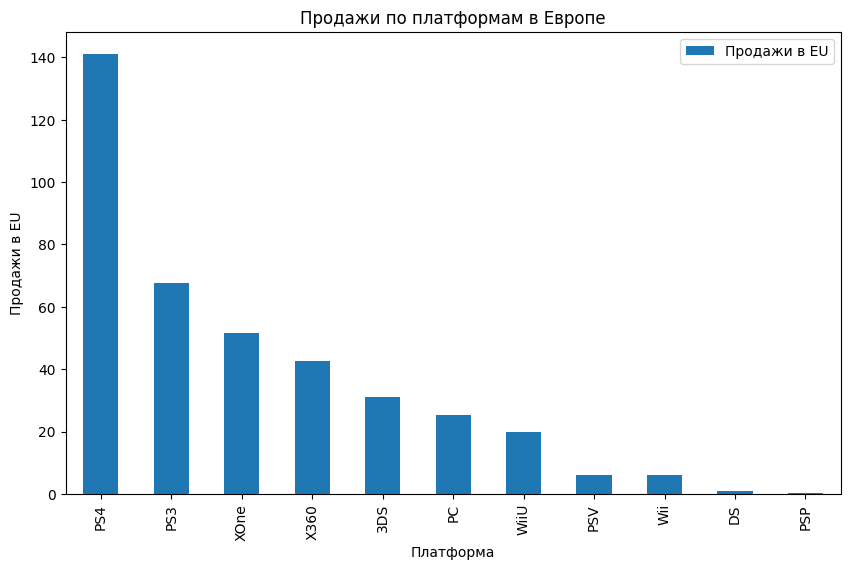

In [70]:
ax = eu_platform_pivot.plot(
    kind = 'bar',
    x = 'Платформа',
    y = 'Продажи в EU', 
    figsize = (10, 6),
    title = 'Продажи по платформам в Европе')

ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи в EU')

plt.show()

В целом набор платформ схож, но в Европе платформы XOne и X360 уже менее популярны чем PS4 и PS3 и далее идёт 3DS. Это можно объяснить тем, что компания выпускающая XOne и X360 является Американской компанией Microsoft и следовательно у себя на родине они популярнее чем в остальном мире.

#### 3.2.2 Наиболее популярные жанры в Европе

In [71]:
eu_genre_pivot = filtered_df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').reset_index()

eu_genre_pivot.columns = ['Жанр', 'Продажи в EU']

eu_genre_pivot = eu_genre_pivot.sort_values('Продажи в EU', ascending = False)

eu_genre_pivot

,Жанр,Продажи в EU
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19
3,Misc,20.04
4,Platform,15.58
9,Simulation,10.92
2,Fighting,8.55
1,Adventure,8.25


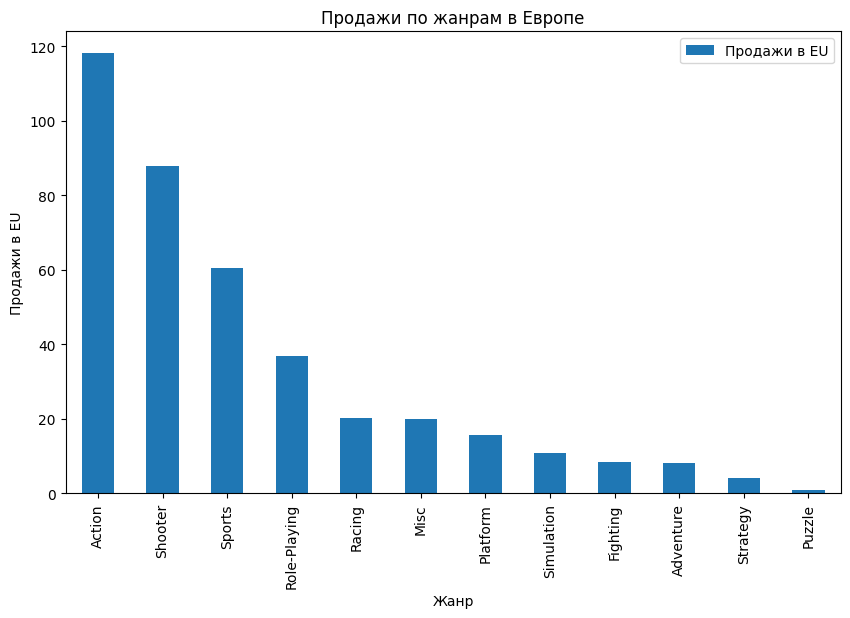

In [72]:
ax = eu_genre_pivot.plot(
    kind = 'bar',
    x = 'Жанр',
    y = 'Продажи в EU', 
    figsize = (10, 6),
    title = 'Продажи по жанрам в Европе')

ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи в EU')

plt.show()

Набор жанров схож, но в Европе чуть популярнее жанр Racing.  А в целом пятёрка лидеров такая же за исключением одного: Action, Shooter, Sports, Role-Playing, Racing.

#### 3.2.3 Зависимость между рейтингом ESRB и продажами в Европе

Напоминаю мою формулу по доступности: E < T < M < A. 

Где Е игра доступная всем и A менее доступная.

In [73]:
eu_rating_pivot = filtered_df.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').reset_index()

eu_rating_pivot.columns = ['Рейтинг', 'Продажи в EU']

eu_rating_pivot = eu_rating_pivot.sort_values('Продажи в EU', ascending = False)

eu_rating_pivot

,Рейтинг,Продажи в EU
2,M,145.32
0,E,83.36
1,E10+,42.69
3,T,41.95


Тут также самые продаваемые игры были с рейтингом M (зрелым 17+) и остальные результаты полностью совпадают. Это в целом можно объяснить тем, что в этот промежуток выходили игры зачастую именно с таким рейтингом. 

**Вывод: В Европе самыми популярными платформами являются: PS4, PS3, далее идут XOne, X360,  и 3DS. Наиболее популярные жанры: Action, Shooter, Sports, Role-Playing и Racing. Тут также не удалось найти взаимосвзяь между возрастным рейтингом игры и её продажами.**

### 3.3. Пользователь из Японии (JP)

#### 3.3.1 Наиболее популярные платформы в Японии


In [74]:
jp_platform_pivot = filtered_df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').reset_index()

jp_platform_pivot.columns = ['Платформа', 'Продажи в JP']

jp_platform_pivot = jp_platform_pivot.sort_values('Продажи в JP', ascending = False)

jp_platform_pivot

,Платформа,Продажи в JP
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88
5,PSP,3.29
9,X360,0.51
10,XOne,0.34
7,Wii,0.05
1,DS,0.00


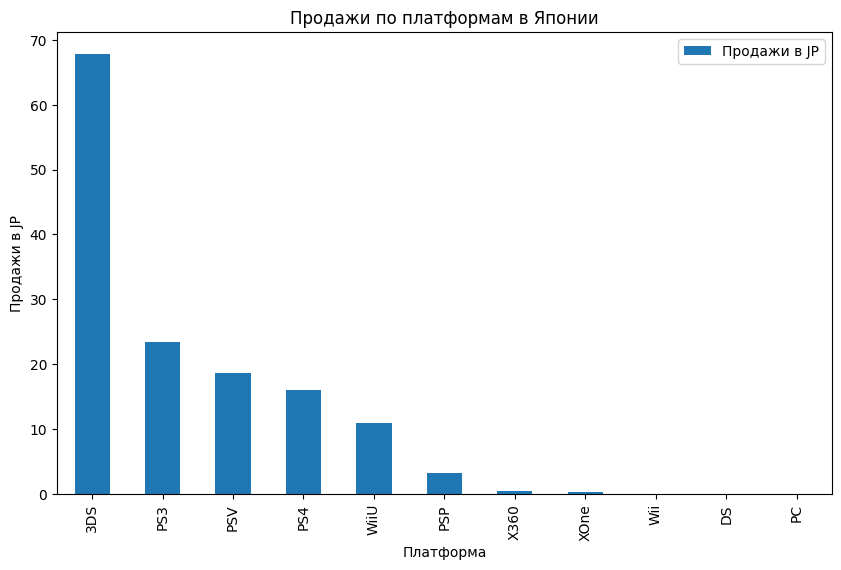

In [75]:
ax = jp_platform_pivot.plot(
    kind = 'bar',
    x = 'Платформа',
    y = 'Продажи в JP', 
    figsize = (10, 6),
    title = 'Продажи по платформам в Японии')

ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи в JP')

plt.show()

Самой популярной платформой в Японии является 3DS, далее идут PS3, PSV, PS4 и WiiU. Это можно легко объяснить, все эти платформы являются отечественными для них. Так как компании Nintendo: 3DS и Sony: PS3,PSV... - являются Японскими компаниями и следовательно у них они стоят дешевле всего и в целом имееют наивысший спрос в сравнении с X360 и XOne от Американской компании Microsoft.

#### 3.3.2 Наиболее популярные жанры в Японии

In [76]:
jp_genre_pivot = filtered_df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').reset_index()

jp_genre_pivot.columns = ['Жанр', 'Продажи в JP']

jp_genre_pivot = jp_genre_pivot.sort_values('Продажи в JP', ascending = False)

jp_genre_pivot

,Жанр,Продажи в JP
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61
1,Adventure,5.82
10,Sports,5.41
4,Platform,4.79
9,Simulation,4.52
6,Racing,2.30


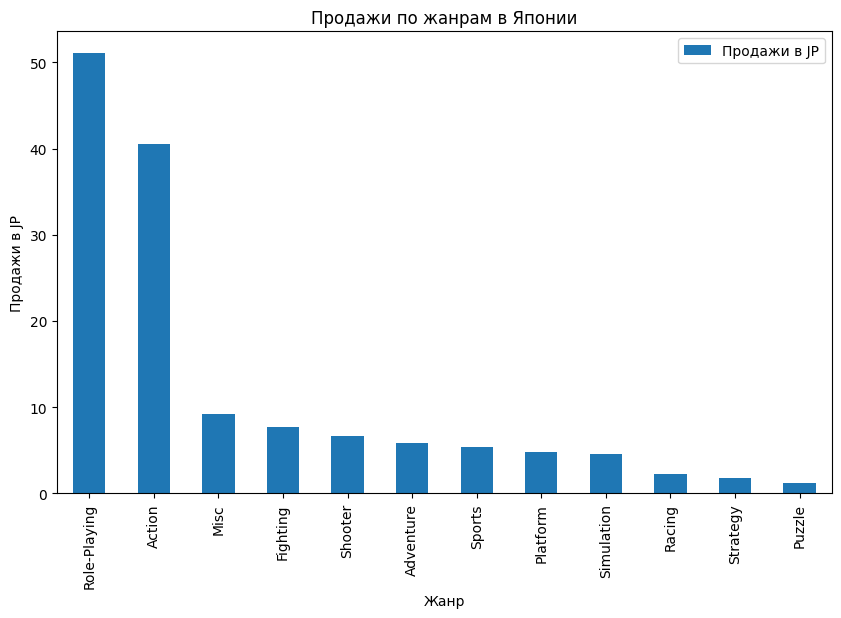

In [77]:
ax = jp_genre_pivot.plot(
    kind = 'bar',
    x = 'Жанр',
    y = 'Продажи в JP', 
    figsize = (10, 6),
    title = 'Продажи по жанрам в Японии')

ax.set_xlabel('Жанр')
ax.set_ylabel('Продажи в JP')

plt.show()

Тут уже преобладают игры жанра Role-Playing, далее идут Action, Misc, Fighting и Shooter игры. Различия можно объяснить разными консолями и играм к ним и заинтересованностью покупателей в целом в таких жанрах. 

#### 3.3.3 Зависимость между рейтингом ESRB и продажами в Японии

Напоминаю мою формулу по доступности: E < T < M < A. 

Где Е игра доступная всем и A менее доступная.

In [78]:
jp_rating_pivot = filtered_df.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').reset_index()

jp_rating_pivot.columns = ['Рейтинг', 'Продажи в JP']

jp_rating_pivot = jp_rating_pivot.sort_values('Продажи в JP', ascending = False)

jp_rating_pivot

,Рейтинг,Продажи в JP
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


In [79]:
# Комментарий ревьюера
temp = filtered_df.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

977 0.43752798925212716


NaN     977
M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

Чаще всего продаются игры с жанром T - для подростков. Возможно жанр Role-Play в целом охватывает именно такую аудиторию. Далее идут E и M с почти одинаковыми результатами. Взаимосвязь может и есть, но чтобы что-либо утверждать доказательств недостаточно.

**Вывод: В Японии самыми популярными платформами являются: 3DS, PS3, PSV, PS4, WiiU. Наиболее популярные жанры: Role-Playing, Action, Misc, Fighting, Shooter. Япония уже сильнее отличается в своих интересах от Американских и Европейских. И подтвердить взаимосвязь рейтинга и продаж также не получилось.**

## 4. Проверка гипотез

### 4.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Так как у нас нужно проверить две независимые выборки воспользуюсь тестом st.ttest_ind с базовыми параметрами: 

1) equal_var - так как выборка большая и берется из одного датасета

2) alternative - чтобы проверить эта гипотеза является двусторонней так идёт проверка только на равенство не более. 


Уровнем статистической значимости (alpha) выставлю стандартное значение 0.05, что соответсвует 95% уверенности в результате, так как в данном случае возможности риска выше и можно оставить пространство в 5% на погрешность. Однако если бы это было касалось какой-либо жизненно важной области например Фармокологии, то уровень стоило бы поставить выше например на 0,01 что соответсвует 99% процентам.

Гипотезы: 

    1) Нулевая гипотеза: среднее значение пользовательских оценок у платформ XOne и PC равны

    2) Альтернативная гипотеза: среднее значение пользовательских оценок у платформ неравны

In [80]:
#С помощью логической индексации исключу все пропущенные значения:
xone_users = filtered_df.loc[(filtered_df['platform'] == 'XOne') &(filtered_df['user_score'].isna() != True), 'user_score']
pc_users = filtered_df.loc[(filtered_df['platform'] == 'PC') & (filtered_df['user_score'].isna() != True), 'user_score']

alpha = 0.05

results = st.ttest_ind(xone_users, pc_users)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не получилось опровергнуть и следовательно нельзя утверждать, что оценки не равны и есть все условия полагать, что они могут быть равны.

**Вывод: Нулевую гипотезу нельзя опровергнуть и пользовательские оценки у обеих платформ могут быть равны.**

### 4.2 Средние пользовательские рейтинги жанров Action и Sports разные.

Тут также две независимые выборки и подходящим тестом будет st.ttest_ind с базовыми параметрами.

Уровнем статистической значимости (alpha) также будет стандартное значение 0.05

Гипотезы: 

    1) Нулевая гипотеза: среднее значение пользовательские рейтинги у жанров Action и Sports равны

    2) Альтернативная гипотеза: среднее значение пользовательских рейтингов у жанров неравны

In [81]:
#С помощью логической индексации исключу все пропущенные значения:
action_games = filtered_df.loc[(filtered_df['genre'] == 'Action') &(filtered_df['user_score'].isna() != True), 'user_score']
sport_games = filtered_df.loc[(filtered_df['genre'] == 'Sports') & (filtered_df['user_score'].isna() != True), 'user_score']

alpha = 0.05

results = st.ttest_ind(action_games, sport_games)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


В данном случае нулевую гипотезу отвергаем, так как p-value больше уровня статистической значимости и пользовательские рейтинги неравны.

**Вывод: Нулевая гипотеза опровергнута, пользовательские рейтинги у жанров Acton и Sports неравны.**

## 5. Общий вывод

Исходные данные являются датасетом из интернет-магазина "Стримчик", котоыре продаёт видеоигры по всему миру. Были предоставлены данные до 2016 года с целью анализа и дальнейшего прогнозирования какие продукты будут потенциально прибыльные в дальнейшем и на какие факторы стоит обратить внимание магазину, а именно какая платформа, жанр и в каком регионе будут популярны. 

Перед началом работы я оценил данные методом info() и вывел первые пять строк с помощью метода head().

**Предобработка данных**

В датасете имеются 11 столбцов: 

* 'Name' - обозначающий название игры, тип данных object и следовательно все названия хранятся в строковом формате. 

* 'Platform' - обозначающий платформу игры, также хранится в строковом формате. Всего доступно 31 платформа

* 'Year_of_Release' - год выпуска игры хранится в числовом формате

* 'Genre' - обозначает жанр игры, всего их 12

* 'NA_sales' - обозначает количество продаж в Северной Америке пишется в сокращенной форме и обозначает миллион, то-есть 1 это 1 миллион и так далее.

* 'EU_sales' - продажи в Европе

* 'JP_sales' - продажи в Японии

* 'Other_sales' - продажи по остальному миру

* 'Critic_score' - обозначает оценку критиков игре, пишется в числовом формате и используется стобальная система оценивания.

* 'User_score' - обозначает оценку пользователей, пишется также в числовом формате, но уже используется десятибальная система оценивания

* 'Rating' - возрастной рейтинг игры согласно системе оценивая ESRB, любой рейтинг начинается с английской буквы и следовательно пишется весь столбец в строков формате.

Далее были построены гистограммы по всем числовым столбцам для оценки распределения значений в них. 

1) 'Year_of_Release' - как и говорилось по условию задачи содержит года до 2016 года (не включительно). Большинство данных встречаются в промежутке от 2003 до 2010 года. Самые ранние игры выходили аж в 1980 году, но таких уже довольно мало. Самые поздние катируются 2015 годом.

2) 'NA_sales / EU_sales / JP_sales' - исходя из гистограмм видно, что три данных столбца имеют большинство данных в одном промежутке от 0 до 2 миллионов. Продажи по Америке доходили и до 40 млн, но таких данных крайне мало. Продажи по Европе не превышали 30 млн, а в Японии и Остальных странах не превышали 10 млн.

3) 'Critic_Score' - данные находятся в промежутке от 0 до 100 (как и по условию) и большинство оценок нахоядстя в промежутке от 60 до 80. И встречаются крайне низкие оценки ниже 20, но их довольно мало.

Были изменены названия столбцов. Для удобства работы с ними они все были приведены к нижнему регистру.

Далее была работа с преобразованием типов данных в нужный формат. Была проведена работа только с двумя столбцами это:

* 'year_of_release' - был переведён в тип данных int, так как год может быть только целочисленным значением, но перед этим нужно было избавиться от пропусков в нём. Работа с пропусками будет описана дальше.

* 'user_score' тип данных изначально стоял строковый, но в контексте оценивания такой тип данных не подходит и поэтому он был преобразован в числовой с плавающей запятой. Перед этим были проверены все уникальные значения в столбце, так как в нём могли содержаться не только числа написанные строкой, но и другие значения. И там нашлось значение tbd - которое означает to be determined - будет определенно, что приравнивается к пропуску значений. После этого методом to.numeric с аргуметом errors = coerce, все значения были строки были преобразованы в числа где это возможон, а где нет ставились пропуски. Далее была построена гистограмма, чтобы оценить значения в столбце. 

Работа с пропусками:

Методом isna было проверено сколько пропусков в данных и какую долю они занимают от общего количества. Большинство пропусков находились в столбцах 'user_score' и 'critic_score', далее столбец 'rating' и в остальных столбцах количество пропусков было незначительно. Далее была проверена гипотеза о том, что пропуски связаны и сделаны в одних и тех же строках и результатом оказалось, что в 73% строк пропуски были сделаны сразу в трёх столбцах одновременно. И было решено, что у пропусков могут быть две возможные причины:

1) Возможно это было вследствии какой-либо технической ошибки при выгрузке данных.

2) При заполнении человеком данных об игре были случайно пропущены данные поля или просто на тот момент значения еще не были выставлены и вследствии поле было пропущено в целом и на старте продаж также не было дополненно.

Так как причину пропусков выяснить не удалось и следовательно восстановить данные нельзя, было решено оставить как есть в столбцах 'rating', 'user_score', 'critic_score', так как при любой попытке заполнить их медианным или подобным значением распределение данных неименуемо сильно изменится и появятся искусственные пики.

Были удалены пропуски в 'year_of_realese', так как они были сделаны без какой-либо закономерности и их количество было незначительным. 

Работа с дубликатами:

Явных дубликатов не было найдено. На неявные дубликаты были проверены названия игр и некоторые названия повторялись многократно. Было определено, что это может быть из-за выпуска сразу на нескольких платформах и также перевыпуски одной игры на одной и той же платформе с усовершенствованиями. Также были проверены методом duplicated с аргументом subset - name, platform, year_of_release. И были найдены две строки полностью повторяющие себя в трех этих столбцах и значения были объеденены в одну строку и дубликаты были удалены. 

**Исследовательский анализ данных**

1) Было исследовано сколько игр выпускалось в разные годы и какие данные из них важны. Для анализа использовалась сводная таблица и линейный график. Начиня с 1980 количество продаж росло вверх до своего пика в 2008 году. Начиная с 2009 года количество проданных копий игр начало стремительно падать вниз, этому могло послужить много факторов. Начиная от падения покупательской способности, так и отсутствием хороших в тот промежуток времени. Было решено, что данные до 1990 года можно отнести к неважным, так как их довольно мало. 

2) Какие продажи по каждой платформе и были выбраны самые продаваемые платформы и также построен график распределения по годам  у каждой из них. Было определено за какой срок появляются новые и исчезают старые платформы. Самые продаваемые платформы это PS2, PS3, X360, Wii и DS. По построенным графикам было замечено, что у каждой платформы был свой пик популярности и также дальнейший спад. Также как одна платформа заменяла другую. НапримерPS2 и PS3. PS2 начиная с 2006 года стала терять свою популярность и это можно связать как раз с появлением PS3 в том же году. И дальше количество продаж игр на PS2 стремительно падало, а у нового поколения консоли росло. Я пришел к выводу, что у любой платформы срок жизни около 10 лет. Дальше старые платформы уже начинают исчезать и набирают популярность новые.

3) Был определён актуальный период для прогнозирования на 2017 год. Актуальным периодом был определён с 2013 по 2016, так как в этот период появились новые платформы и в целом график начал изменяться в этот промежуток.

4) Лидирующие по продажам платформы в актуальный период времени. Исходя из построенных графиков было замечено, что самые высокие показатели у XOne и PS4, так как они являются последними моделями и если выбирать потенциально прибыльные платформы то тут лучше всего подойдут они, так как остальные уже считаются устаревшими. PS4 нужно выделить как более вероятную, так как график продаж у неё даже на 2016 год остаётся довольно высоким. Потенциально прибильные платформами можно назвать PS4 и XOne

5) Были построены графики boxplot глобальных продаж игр по платформам. Исходя из полученных результатов было выяснено, что чем моложе платформа тем больше выбросов в данных и экстремально высоких значений. Это можно объяснить, тем что выборка взята от 2013 года и старые платформы уже потеряли популярность и значения у них более предсказумые и стабильные. Ну и при выборе платформ стоит смотреть на её "свежесть", например PS4/PS3 и XOne/X360 и если брать актуальный период медианна у таких консолей выше и следовательно приносить прибыль они будут чаще.

6) Было определено как отзывы критиков и игроков влияют на продажи внутри одной популярной платформы. Такой платформой была выбрана PS4 и по ней была построена диаграмма рассеяния и был просчитан коэффициент корреляции. Исходя из полученных результатов было замечено, что есть положительная корреляция, то-есть с ростом оценок критиков растут и продажи. Связь между двумя величинами имеется, но не слишком сильная. Но для оценок пользователей положительной корреляции замечено не было и утверждение, что чем выше оценки пользователей тем выше продажи подтвердить нельзя. На продажи оценки критиков влияют сильнее, чем оценки пользователей. Это можно объяснить тем, что критикам обычно игры достаются раньше, так сказать на предварительную оценку. Поэтому собственно большинство продаж происходит в момент когда еще не все пользователи выставили оценки и покупатели зачастую опираются на оценки критиков.
7) Были проверены результаты предыдущего исследования на другой популярной платформе PC (Персональный комьютер). Гипоетеза не была опровергнута и оценки критиков всё также больше влияют на продажи, чем оценки пользователей. Также были проверены и другие популярыне платформы и гипотеза не была опровергнута, так как результаты были схожи. Следовательно при выборе игр на окупаемость, стоит обращать внимание на мнение критиков. 


8) Было проверено общее распределение игр по жанрам и были выявлены самые прибльные жанры. Самым часто-встречающимся жанром является Action, он занимает почти 35% процентов от всей доли игр. Самым непопулярным Puzzle с его 0.8% процентами. Также популярными жанрами являются RolePlaying, Adventure, Sports и Shooter. Людям больше нравятся активные игры, нежели чем игры с упором на умственную нагрузку. А по поводу продаваемости можно в лидерах увидеть Action, таких игр много и еще они и продаются хорошо. Стоит тажке выделить Shooter, их относительно Action игр меньше, но продаются они достаточно хорошо. Ну и самыми менее продаваемым снова оказался Puzzle. Что укрепляет теорию о том, что клиентам больше нравятся активыне игры. Также было проверено медианное значение продаж у каждого жанра и было выяснено, что хоть игры жанра Action принесли наибольшие суммарные продажи, но медианное значение довольно низкое и вероятность не окупиться у этого жанра ниже.  В то же время Shooter, Sports в двух вариантах показали себя хорошо и лучше ставить на них при выявлении потенциально прибыльных жанров.

**Вывод исследования.** При построении прогнозов на 2017 год стоит обратить на данные факторы:

* Среди платформ стоит обратить внимание на эти 4 консоли PS4, PS3, XOne, X360. Так как они являются самыми актуальными и вероятнее всего не потеряют актуальность в 2017 году. 
* Самыми прибильными жанрами за актуальный период оказались жанры Shooter, Sports. Жанр Action получил довольно большие продажи, но он может оказаться нестабильным, поэтому это лучше отнести к рисковым жанрам.
* При выборе игры покупатели чаще смотрят на оценки Критиков чем на Пользовательские оценки. Поэтому при выборе игр на 2017 год стоит больше опираться на оценки критиков.

**Были построены примерные портреты пользователей трёх регионов NA/EU/JP и проверна зависимость между возрастным рейтингом и продажами**

1) Пользователь из Севеной Америки вероятнее всего будет покупать игры на данные платформы PS4 и XOne, далее идут X360, PS3 и 3DS. Тут стоит обратить внимание еще на XOne и X360 от Американской компании Microsoft, так как они производятся там же и спрос у них выше чем в остальном мире. Любимыми жанрами этого человека будут вероятнее всего активыне жанры - Action, Shooter, Sports, Role-Playing и Misc. Зависимость между рейтингом игры и продажами не была выявлена.

2) Пользователь из Евпроы чаще всего имеет у себя платформу PS4 или PS3 при этом Xbox реже, чем покупатель из Америки. Самые популярные у них жанры это: Action, Shooter, Sports, Role-Playing, Racing. В целом жанры схожи с Американскими, но в Европе чуть больше ценят жанр Racing (Гоночные симмуляторы). Также зависимость от возрастного рейтинга не была подчеркнута в данном регионе. 

3) Пользователь из Японии. Тут данные значительно отлчилась от других групп, можно объяснить абсолютно другой культурой и следовательно интересы у  людей разные. Самой популярной платформой в Японии является 3DS, далее идут PS3, PSV, PS4 и WiiU - это всё Японские платформы и они там ценятся больше всего. Также в Японии преобладают игры жанра Role-Playing, далее идут Action, Misc, Fighting и Shooter игры. Различия можно объяснить разными консолями и играм к ним и заинтересованностью покупателей в целом в таких жанрах. Взаимосвязи между возрастным рейтингом и продажами было также недостаточно для подтверждения теории. 

**Проверки гипотез**

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
Были выдвинуты две гипотезы: 

     * Нулевая гипотеза: среднее значение пользовательских оценок у платформ XOne и PC равны
     * Альтернативная гипотеза: среднее значение пользовательских оценок у платформ неравны

**Вывод: По полученным результатам нулевую гипотезу нельзя опровергнуть и пользовательские оценки у обеих платформ могут быть равны.**


2) Средние пользовательские рейтинги жанров Action и Sports разные.
Были выдвинуты две гипотезы: 

     * Нулевая гипотеза: среднее значение пользовательские рейтинги у жанров Action и Sports равны
     * Альтернативная гипотеза: среднее значение пользовательских рейтингов у жанров неравны

**Вывод: Нулевая гипотеза была опровергнута и среднее значение пользовательских оценок у жанров разное.**